In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


In [2]:
import warnings

warnings.filterwarnings("ignore")


# DATA LOADING

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
test=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')
print(train.shape,test.shape)

(20000, 22) (5000, 21)


In [5]:
train.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [6]:
test.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


In [7]:
train.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category'],
      dtype='object')

In [8]:
y_train=train['Crime_Category']

In [9]:
train.drop(['Crime_Category'],axis=1,inplace=True) # Removing target variable from training data

# EXPLORATORY DATA ANALYSIS

In [10]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [11]:
print("Categorical Features\n:")
categorical=[i for i in train.columns if train[i].dtype=='object']
print(categorical)
print('\n')
print("Numerical Features\n:")
numerical=[i for i in train.columns if train[i].dtype=='float64']
print(numerical)

Categorical Features
:
['Location', 'Cross_Street', 'Date_Reported', 'Date_Occurred', 'Area_Name', 'Modus_Operandi', 'Victim_Sex', 'Victim_Descent', 'Premise_Description', 'Weapon_Description', 'Status', 'Status_Description']


Numerical Features
:
['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID', 'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code', 'Weapon_Used_Code']


In [12]:
print("Distribution of target variable-'Crime category'")
print(y_train.value_counts())

Distribution of target variable-'Crime category'
Crime_Category
Property Crimes                  11666
Violent Crimes                    4767
Crimes against Public Order       1808
Fraud and White-Collar Crimes     1355
Crimes against Persons             225
Other Crimes                       179
Name: count, dtype: int64


### KEY STATISTICS

In [13]:
print("*************Train data*************")
print(train.describe())
print('\n')
print("*************Test data*************")
print(test.describe())

*************Train data*************
           Latitude     Longitude  Time_Occurred       Area_ID  \
count  20000.000000  20000.000000   20000.000000  20000.000000   
mean      33.940704   -117.893072    1352.380350     10.834250   
std        2.126810      7.377726     646.100291      6.033166   
min        0.000000   -118.663400       1.000000      1.000000   
25%       34.009200   -118.429700     930.000000      6.000000   
50%       34.058700   -118.323000    1430.000000     11.000000   
75%       34.165025   -118.274400    1900.000000     16.000000   
max       34.328100      0.000000    2359.000000     21.000000   

       Reporting_District_no      Part 1-2    Victim_Age  Premise_Code  \
count           20000.000000  20000.000000  20000.000000  20000.000000   
mean             1129.599200      1.418150     30.135000    297.176950   
std               603.330519      0.493267     21.863645    212.007298   
min               101.000000      1.000000     -2.000000    101.000000  

#### * The mean and median of most of the features is same,therefore we can assume the normality of distribution and also the outliers may not affect the data adversly
#### * The standard deviation is higher for variables such as Time_occurred,reporting_district_no,premise_code and weapon_used_code
#### * The statistics of training and test data is almost similar

In [14]:
# Number of unique values of each feature
for i in train.columns:
    print(i,'-',train[i].nunique())

Location - 12399
Cross_Street - 1495
Latitude - 3622
Longitude - 3578
Date_Reported - 811
Date_Occurred - 366
Time_Occurred - 996
Area_ID - 21
Area_Name - 21
Reporting_District_no - 1120
Part 1-2 - 2
Modus_Operandi - 10489
Victim_Age - 100
Victim_Sex - 4
Victim_Descent - 17
Premise_Code - 217
Premise_Description - 216
Weapon_Used_Code - 57
Weapon_Description - 57
Status - 5
Status_Description - 5


#### The number of unique values is high for features like 'Location', 'Cross_Street', 'Modus_Operandi', 'Latitude', 'Longitude', 'Time_Occurred', 'Reporting_District_no' which may not contribute highly to the prediction due to the diversity compared to other features.

### DETECTING MISSING DATA

In [15]:
print("*************Train data*************")
print(train.isnull().sum())
print('\n')
print("*************Test data*************")
print(test.isnull().sum())

*************Train data*************
Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
dtype: int64


*************Test data*************
Location                    0
Cross_Street             4190
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Area_Name            

#### Missing values are detected in features such as Cross_street,Modus_Operandi,Victim_Sex ,Victim_Descent,Weapon_Used_Code and Weapon_Description

#### **Checking the sanity of numerical columns**

In [16]:
num=['Time_Occurred', 'Area_ID', 'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code', 'Weapon_Used_Code']
(train[num] < 0).sum()

Time_Occurred            0
Area_ID                  0
Reporting_District_no    0
Part 1-2                 0
Victim_Age               6
Premise_Code             0
Weapon_Used_Code         0
dtype: int64

In [17]:
train['Victim_Age'] = train['Victim_Age'].apply(lambda col: np.nan if col < 0 else col)

In [18]:
question_mark_count = train.apply(lambda col: col.astype(str).str.count('\?').sum())
print(question_mark_count)

Location                 0
Cross_Street             0
Latitude                 0
Longitude                0
Date_Reported            0
Date_Occurred            0
Time_Occurred            0
Area_ID                  0
Area_Name                0
Reporting_District_no    0
Part 1-2                 0
Modus_Operandi           0
Victim_Age               0
Victim_Sex               0
Victim_Descent           0
Premise_Code             0
Premise_Description      0
Weapon_Used_Code         0
Weapon_Description       0
Status                   0
Status_Description       0
dtype: int64


## DATA VISUALIZATION

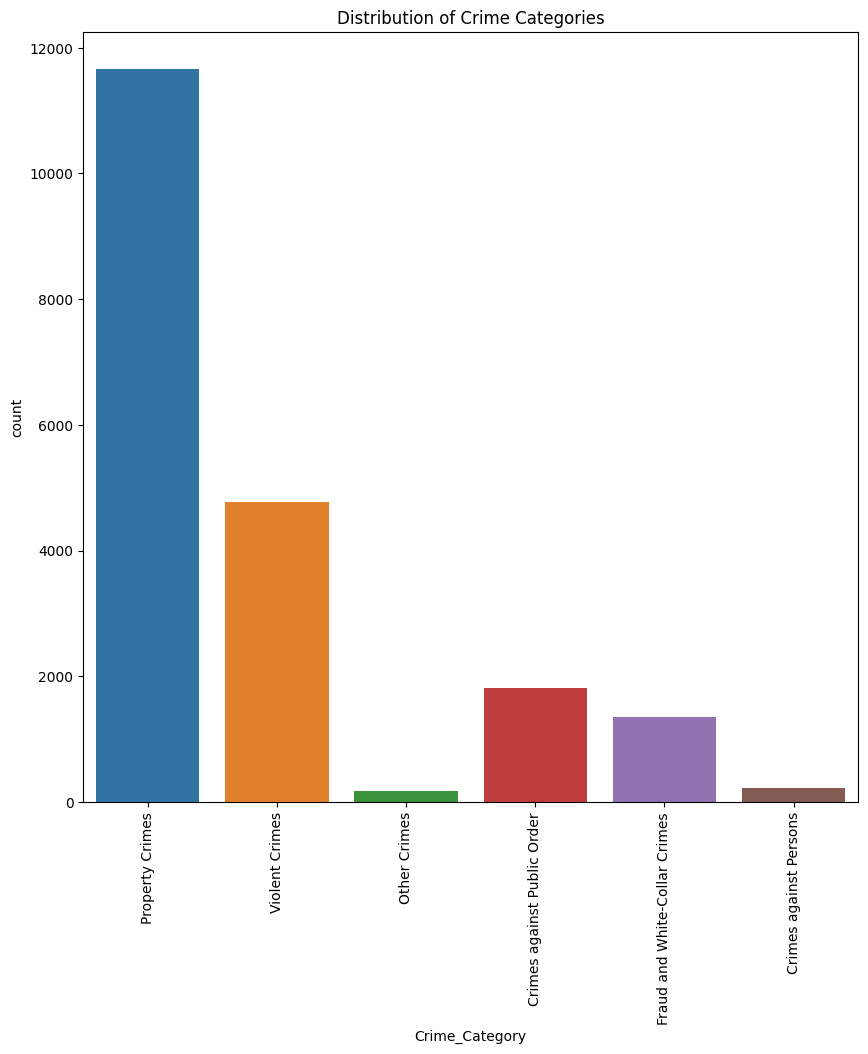

In [19]:
# Visualizing the distribution of target variable
plt.figure(figsize=(10,10))
sns.countplot(x=y_train)
plt.xticks(rotation=90)
plt.title('Distribution of Crime Categories')
plt.show()

#### Classes are imbalanced.More than half of the crimes are property crimes and least is other crimes

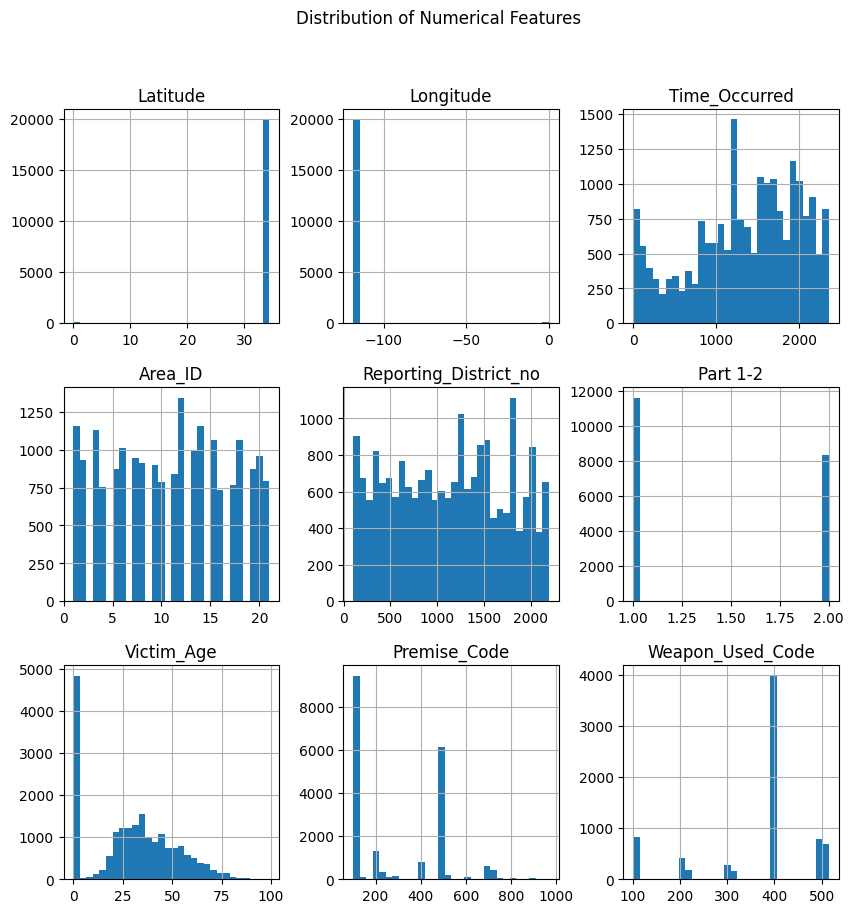

In [20]:
train[numerical].hist(figsize=(10,10),bins=30)
plt.suptitle('Distribution of Numerical Features')
plt.show()

#### For variables like Time_Occurred and Victim_Age, we can assume normality from the graph itself.
#### The other variables like Part 1_2 take only limited number of unique values(discrete)

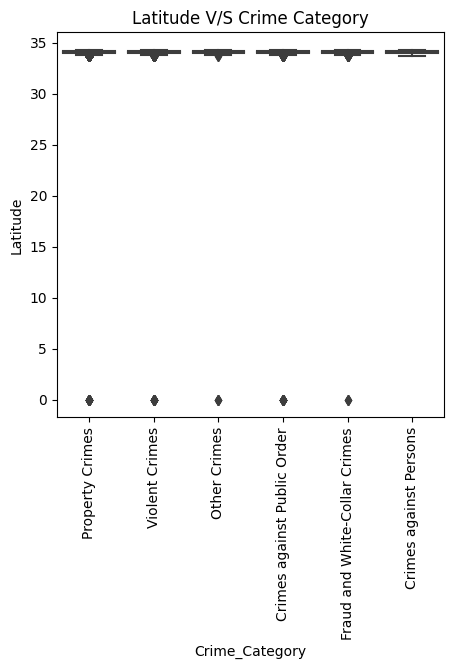

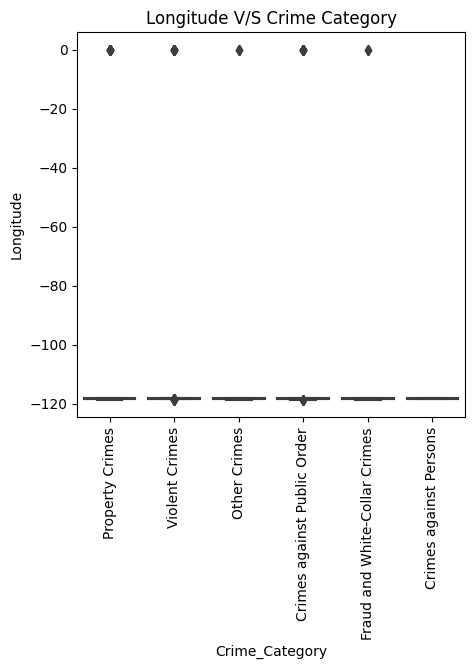

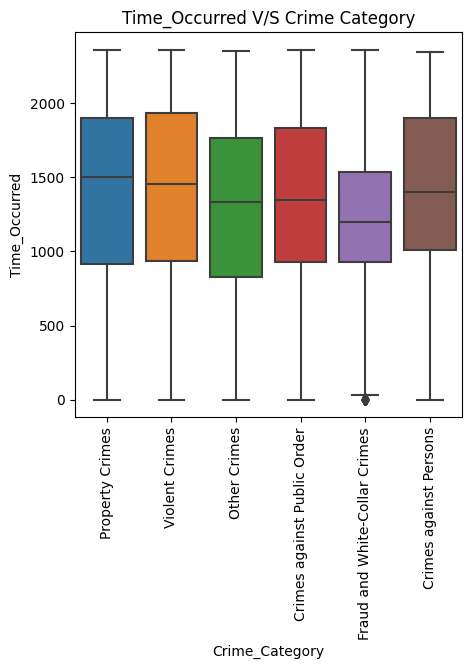

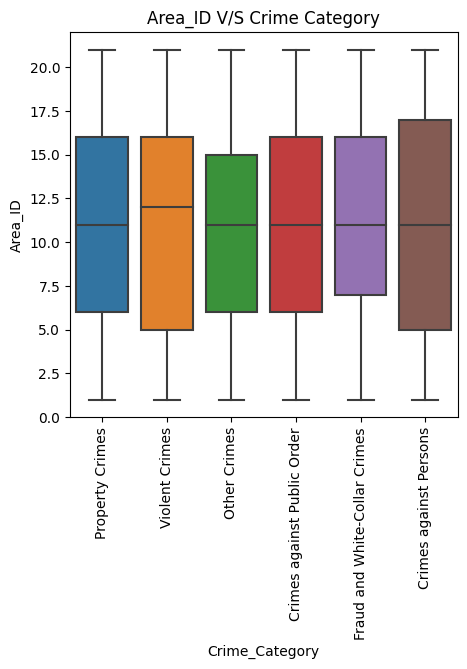

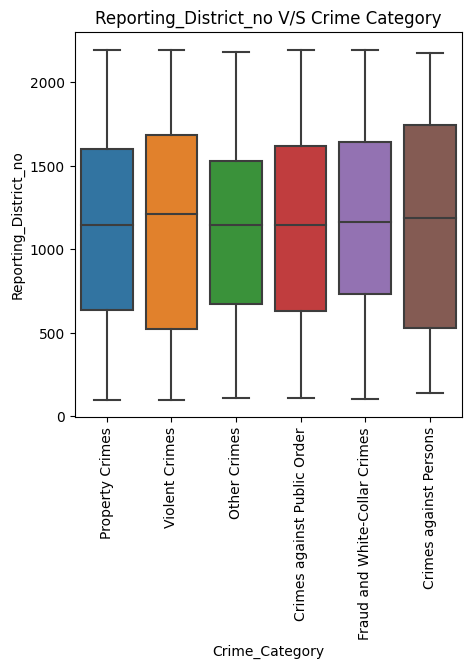

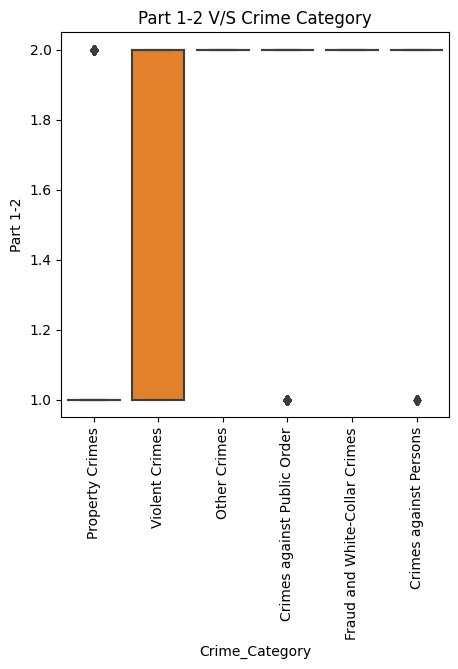

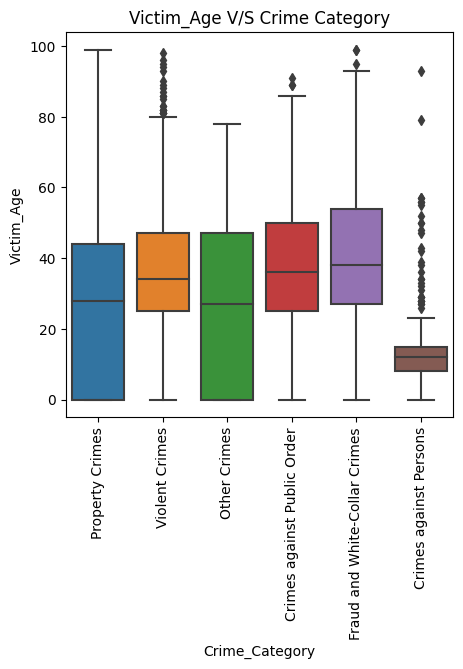

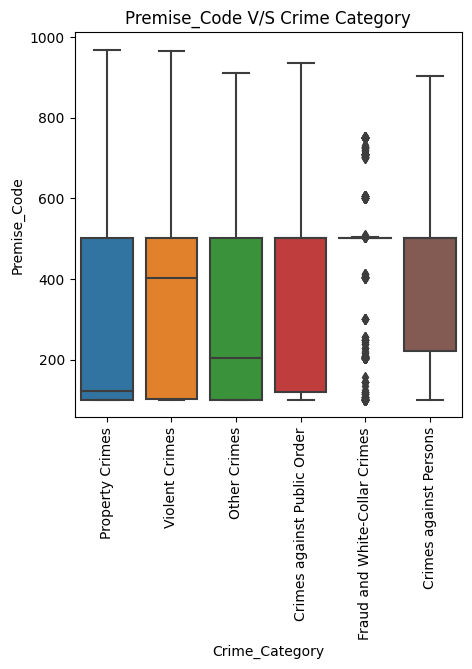

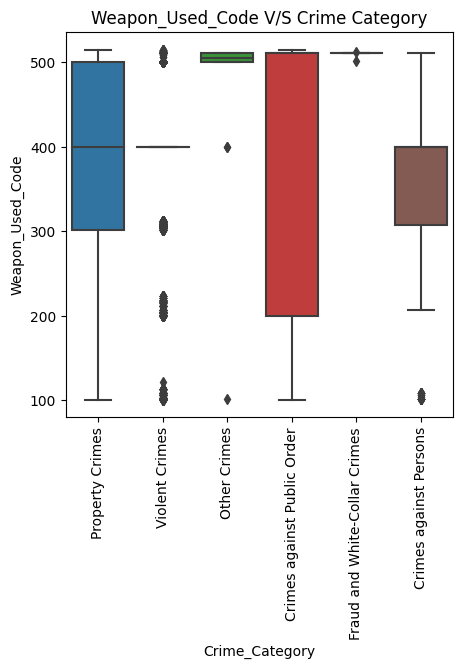

In [21]:
# Visualising the relationship between numerical variables and target variable
for i in numerical:
    plt.figure(figsize=(5,5))
    sns.boxplot(x=y_train,y=train[i])
    plt.title(f'{i} V/S Crime Category')
    plt.xticks(rotation=90)
    plt.show()


#### **Detecting outliers in columns such as Victim_Age,Premise_Code,Weapon_Used_code**

* #### The median and spread of the distribution across different classes is almost similar for featurs like Area_iD,Time_Occurred and reporting_District_No
* #### The victims of the category "Crime against persons' are people below 20 years of age,whereas the victims of other categories are between 20-40
* #### The median and spread of the distribution across different classes is highly different for features like Weapon_Used_Code,Premise_Code

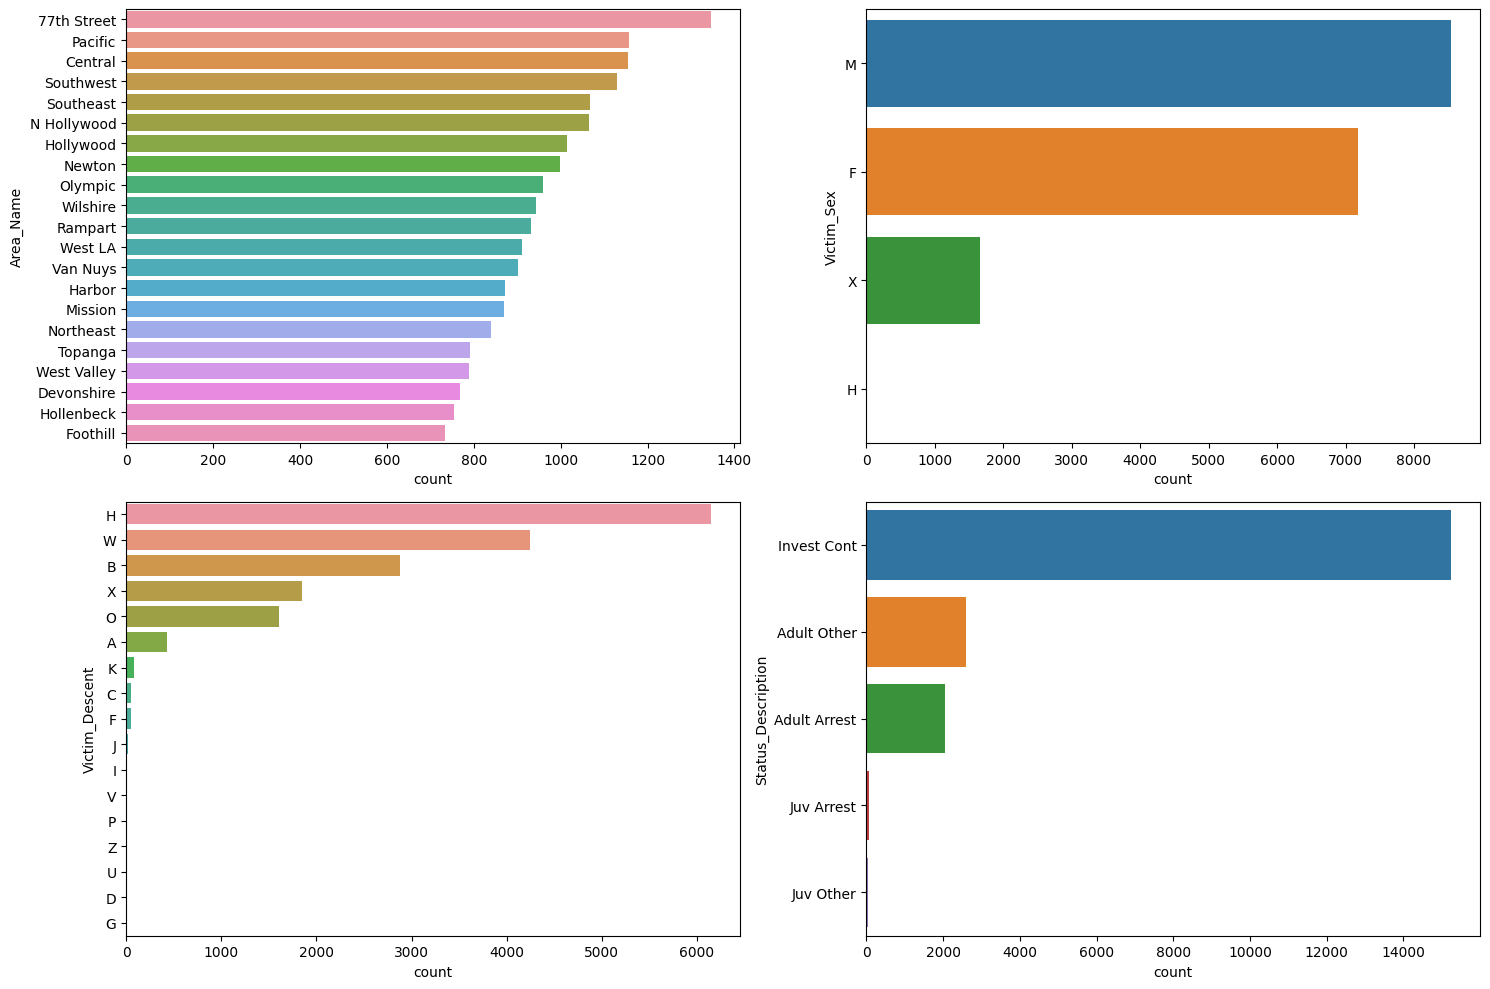

In [22]:
# Analysing the distribution of count of some categorical features
l=['Area_Name', 'Victim_Sex', 'Victim_Descent', 'Status_Description']
fig,axs = plt.subplots(2, 2, figsize=(15, 10))
for i,value in enumerate(l):
    row = i // 2
    col = i % 2
    sns.countplot(y=value,data=train,order=train[value].value_counts().index,ax=axs[row,col])

plt.tight_layout()
plt.show()

* #### The male and female count of victims are almost equal but slightly males are higher
* #### The majority of descendants belong to H usually stands for Hispanic or Latino,second are the whites
* #### More than half of status of crimes are invest_cont

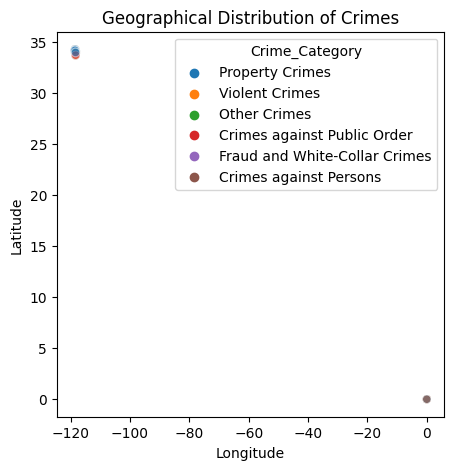

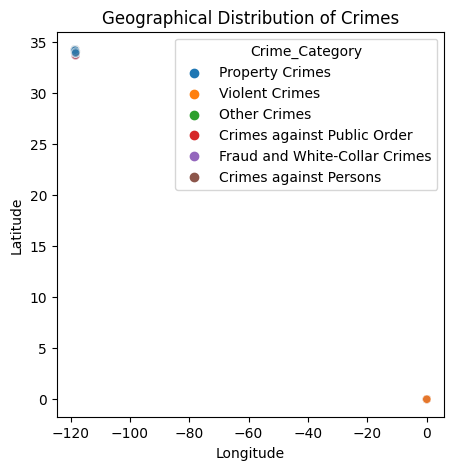

In [23]:
# Visualising geographical points of crimes using latitude and longitude
plt.figure(figsize=(5,5))
sns.scatterplot(x=train['Longitude'],y=train['Latitude'],hue=y_train,alpha=0.5)
plt.title('Geographical Distribution of Crimes')
plt.show()

plt.figure(figsize=(5,5))
sns.scatterplot(x=test['Longitude'],y=test['Latitude'],hue=y_train,alpha=0.5)
plt.title('Geographical Distribution of Crimes')
plt.show()

#### The data is mainly collected from 2 geographical locations plotted in the graph for both training and test data

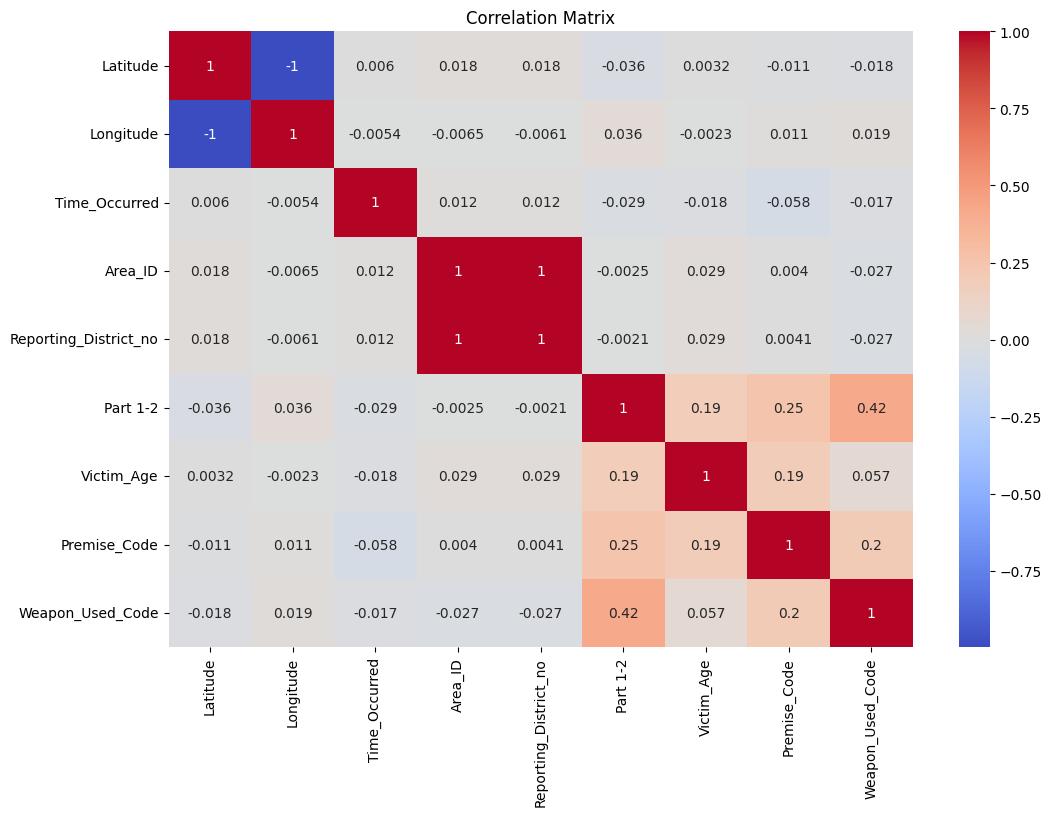

In [24]:
plt.figure(figsize=(12, 8))
corr_matrix = train[numerical].corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


* #### Reporting_district_no and Area_ID has a correlation of 1 indicationg perfect positivelinear relation between the variables.
* #### Latitude and Longitude has a correlation of -1 indicationg perfect negative linear relation
* #### The othe correlation values are not so significant

#### *The number of unique values for some of the features are same.Comparing those feature's value counts in the following codes*

In [25]:
print(train['Weapon_Used_Code'].value_counts())
print(train['Weapon_Description'].value_counts())

Weapon_Used_Code
400.0    3990
500.0     789
511.0     546
102.0     388
200.0     160
109.0     154
106.0     131
207.0     125
307.0      84
512.0      80
306.0      63
212.0      55
312.0      52
304.0      51
308.0      49
205.0      45
201.0      43
114.0      41
204.0      37
302.0      37
113.0      35
101.0      34
301.0      26
310.0      26
215.0      25
223.0      24
311.0      23
219.0      23
506.0      22
107.0      18
515.0      18
218.0      17
305.0      16
221.0      14
216.0      13
103.0      12
309.0      11
112.0       8
104.0       7
514.0       7
211.0       6
513.0       4
303.0       4
510.0       3
206.0       3
508.0       2
504.0       2
105.0       2
214.0       2
503.0       1
501.0       1
202.0       1
111.0       1
210.0       1
122.0       1
115.0       1
213.0       1
Name: count, dtype: int64
Weapon_Description
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    3990
UNKNOWN WEAPON/OTHER WEAPON                        789
VERBAL THREAT                 

In [26]:
print(train['Status'].value_counts())
print(train['Status_Description'].value_counts())

Status
IC    15236
AO     2597
AA     2054
JA       70
JO       43
Name: count, dtype: int64
Status_Description
Invest Cont     15236
Adult Other      2597
Adult Arrest     2054
Juv Arrest         70
Juv Other          43
Name: count, dtype: int64


In [27]:
print(train['Premise_Code'].value_counts())
print(train['Premise_Description'].value_counts())

Premise_Code
101.0    5033
501.0    3379
502.0    2491
108.0    1437
102.0     978
         ... 
214.0       1
909.0       1
896.0       1
744.0       1
250.0       1
Name: count, Length: 217, dtype: int64
Premise_Description
STREET                                          5033
SINGLE FAMILY DWELLING                          3379
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    2491
PARKING LOT                                     1437
SIDEWALK                                         978
                                                ... 
BUS DEPOT/TERMINAL, OTHER THAN MTA                 1
MTA - RED LINE - HOLLYWOOD/WESTERN                 1
MTA - SILVER LINE - ROSECRANS                      1
HIGH-RISE BUILDING                                 1
COMPUTER SERVICES/REPAIRS/SALES                    1
Name: count, Length: 216, dtype: int64


In [28]:
print(train['Area_Name'].value_counts())
print(train['Area_ID'].value_counts())

Area_Name
77th Street    1345
Pacific        1157
Central        1156
Southwest      1130
Southeast      1067
N Hollywood    1065
Hollywood      1014
Newton          999
Olympic         960
Wilshire        943
Rampart         931
West LA         910
Van Nuys        902
Harbor          872
Mission         870
Northeast       839
Topanga         792
West Valley     790
Devonshire      769
Hollenbeck      755
Foothill        734
Name: count, dtype: int64
Area_ID
12.0    1345
14.0    1157
1.0     1156
3.0     1130
18.0    1067
15.0    1065
6.0     1014
13.0     999
20.0     960
7.0      943
2.0      931
8.0      910
9.0      902
5.0      872
19.0     870
11.0     839
21.0     792
10.0     790
17.0     769
4.0      755
16.0     734
Name: count, dtype: int64


In [29]:
# Removing features such as Status_Description,Area_Name,Weapon_Description,Premise_Description since the same information is given by the fearures Status,Area_ID,Weapon_Used_Code and Premise_code
# Removing cross_street since there is already a feature 'Location'
# Removing Longitude since latitude and longitude has correlation -1,therefore one of the features-latitude or longitude is needed
train.drop(['Status_Description','Area_Name','Weapon_Description','Premise_Description','Cross_Street','Longitude'], axis=1, inplace=True)

## FEATURE ENGINEERING

In [30]:
train.columns

Index(['Location', 'Latitude', 'Date_Reported', 'Date_Occurred',
       'Time_Occurred', 'Area_ID', 'Reporting_District_no', 'Part 1-2',
       'Modus_Operandi', 'Victim_Age', 'Victim_Sex', 'Victim_Descent',
       'Premise_Code', 'Weapon_Used_Code', 'Status'],
      dtype='object')

In [31]:
# Dealing with features such as Date_Reported and Date_Occurred
for i in range(train.shape[0]):
    train.at[i,'Date_Occurred']=train['Date_Occurred'][i].split()[0]
for i in range(train.shape[0]):
    train.at[i,'Date_Reported']=train['Date_Reported'][i].split()[0]
train['Date_Reported']=pd.to_datetime(train['Date_Reported'])
train['Date_Occurred']=pd.to_datetime(train['Date_Occurred'])

# Extracting year,month,day and day of week from Date_Reported
train['Year_Reported']=train['Date_Reported'].dt.year
train['Month_Reported']=train['Date_Reported'].dt.month
train['Day_Reported']=train['Date_Reported'].dt.day
train['DayOfWeek_Reported']=train['Date_Reported'].dt.dayofweek

# Extracting year,month,day and day of week from Date_Occured
train['Year_Occurred']=train['Date_Occurred'].dt.year
train['Month_Occurred']=train['Date_Occurred'].dt.month
train['Day_Occurred']=train['Date_Occurred'].dt.day
train['DayOfWeek_Occurred']=train['Date_Occurred'].dt.dayofweek

#### *Plotting graphs to examine whether the above extracted features have significance in model building*

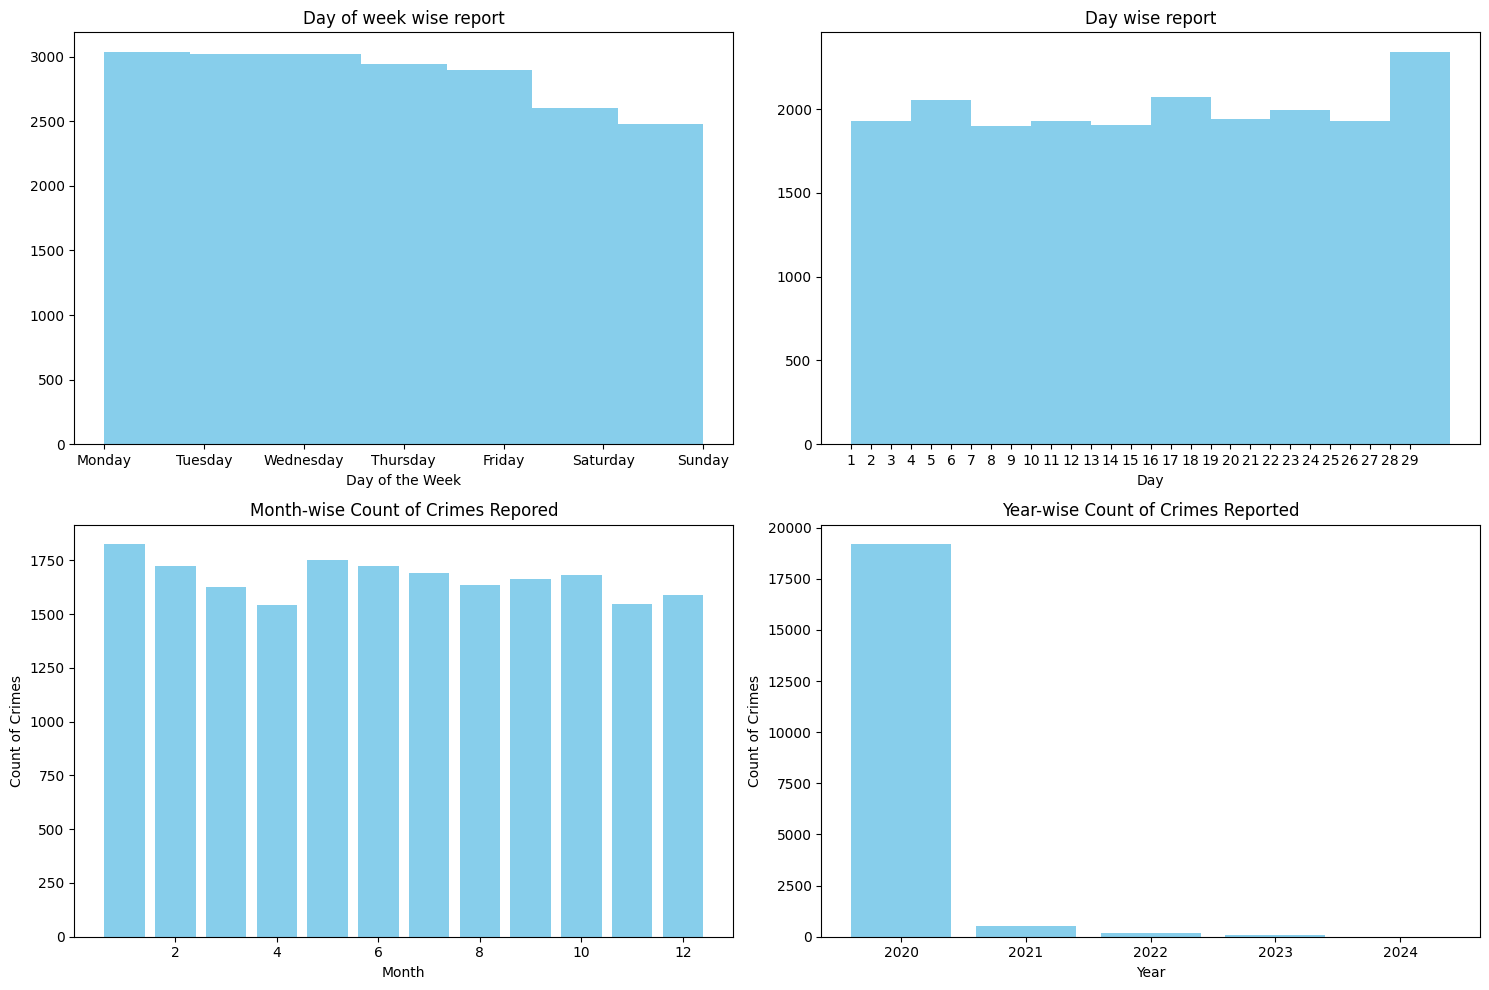

In [32]:
# Plotting year,month,day and day of week of date reported

fig,axs=plt.subplots(2, 2, figsize=(15, 10))

# First subplot: Day of week wise report
axs[0,0].hist(train['DayOfWeek_Reported'],bins=7,color='skyblue')
axs[0,0].set_title('Day of week wise report')
axs[0,0].set_xlabel('Day of the Week')
axs[0,0].set_xticks(range(7))
axs[0,0].set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

# Second subplot: Day wise report
axs[0,1].hist(train['Day_Reported'],color='skyblue')
axs[0,1].set_title('Day wise report')
axs[0,1].set_xlabel('Day')
axs[0,1].set_xticks(range(1,30))

# Third subplot: Month-wise Count of Crimes Reported
monthly_counts_reported = train['Month_Reported'].value_counts().sort_index() 
axs[1,0].bar(monthly_counts_reported.index, monthly_counts_reported.values, color='skyblue')
axs[1,0].set_xlabel('Month')
axs[1,0].set_ylabel('Count of Crimes')
axs[1,0].set_title('Month-wise Count of Crimes Repored')

# Fourth subplot: Year-wise Count of Crimes Reported
yearly_counts_reported = train['Year_Reported'].value_counts().sort_index()
axs[1,1].bar(yearly_counts_reported.index, yearly_counts_reported.values, color='skyblue')
axs[1,1].set_xlabel('Year')
axs[1,1].set_ylabel('Count of Crimes')
axs[1,1].set_title('Year-wise Count of Crimes Reported')


plt.tight_layout()
plt.show()


#### *The day_of_week,day,month of date reported has more or less equal distribution and almost all cases are reported in the year 2020*

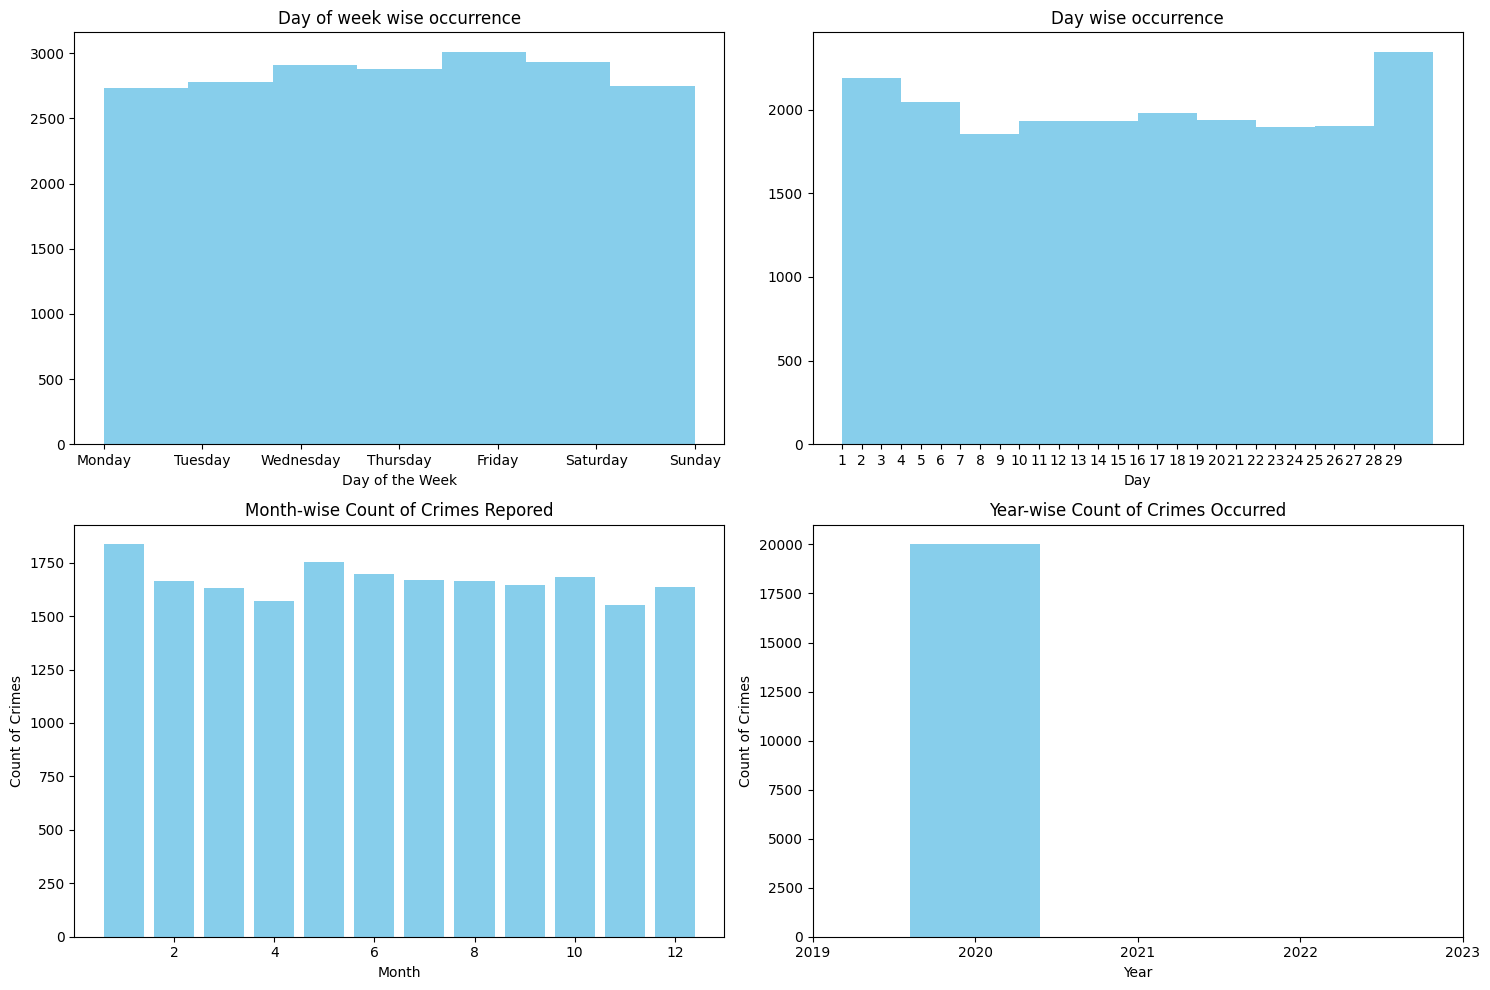

In [33]:
# Plotting year,month,day and day of week of date Occurred

fig,axs=plt.subplots(2, 2, figsize=(15, 10))

# First subplot: Day of week wise occurrence
axs[0,0].hist(train['DayOfWeek_Occurred'],bins=7,color='skyblue')
axs[0,0].set_title('Day of week wise occurrence')
axs[0,0].set_xlabel('Day of the Week')
axs[0,0].set_xticks(range(7))
axs[0,0].set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

# Second subplot: Day wise occurrence
axs[0,1].hist(train['Day_Occurred'],color='skyblue')
axs[0,1].set_title('Day wise occurrence')
axs[0,1].set_xlabel('Day')
axs[0,1].set_xticks(range(1,30))

# Third subplot: Month-wise Count of Crimes Occurred
monthly_counts_Occurred = train['Month_Occurred'].value_counts().sort_index() 
axs[1,0].bar(monthly_counts_Occurred.index, monthly_counts_Occurred.values, color='skyblue')
axs[1,0].set_xlabel('Month')
axs[1,0].set_ylabel('Count of Crimes')
axs[1,0].set_title('Month-wise Count of Crimes Repored')

# Fourth subplot: Year-wise Count of Crimes Occurred
yearly_counts_Occurred = train['Year_Occurred'].value_counts().sort_index()
axs[1,1].bar(yearly_counts_Occurred.index, yearly_counts_Occurred.values, color='skyblue')
axs[1,1].set_xlabel('Year')
axs[1,1].set_ylabel('Count of Crimes')
axs[1,1].set_title('Year-wise Count of Crimes Occurred')
axs[1,1].set_xticks(range(2019,2024))


plt.tight_layout()
plt.show()


#### *The day_of_week,day,month of date occurred has more or less equal distribution and  all cases are occured in the year 2020*

In [34]:
# Extracting the hour occured from the feature time occured
train['Time_Occurred']=train['Time_Occurred'].astype(float).astype(int).astype(str).str.zfill(4)
for i in range(train.shape[0]):
    if int(train.iloc[i,4][2:])>=30:
        train.at[i,'Hour_Occurred']=int(train.iloc[i,4][:2])+1
    else:
        train.at[i,'Hour_Occurred']=int(train.iloc[i,4][:2])

Text(0.5, 1.0, 'Hour-wise Count of Crimes')

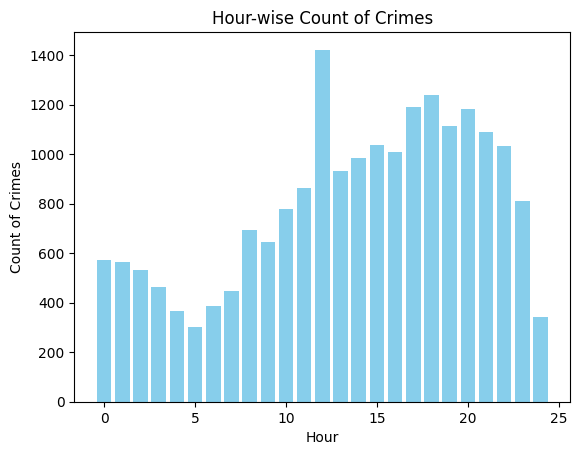

In [35]:
# Plotting the hour wise distribution
hourly_counts=train['Hour_Occurred'].value_counts().sort_index()
plt.bar(hourly_counts.index, hourly_counts.values, color='skyblue')
plt.xlabel('Hour')
plt.ylabel('Count of Crimes')
plt.title('Hour-wise Count of Crimes')

#### *More crimes are occurring during evening times and the peak is observed around 12PM*

In [36]:
# Since the day_of_week,day,month of of both date occurred and reported have similar distribution across different values,It can be assumed that those values wont contribute much to the prediction.
# Also, the year of both crime reported and occured is 2020 for almost all cases
# Dropping those features and time_occurred
train.drop(['Day_Reported','DayOfWeek_Reported','Month_Reported','Year_Reported','Day_Occurred','DayOfWeek_Occurred','Month_Occurred','Year_Occurred','Time_Occurred','Date_Reported','Date_Occurred'], axis=1, inplace=True)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Latitude               20000 non-null  float64
 2   Area_ID                20000 non-null  float64
 3   Reporting_District_no  20000 non-null  float64
 4   Part 1-2               20000 non-null  float64
 5   Modus_Operandi         17259 non-null  object 
 6   Victim_Age             19994 non-null  float64
 7   Victim_Sex             17376 non-null  object 
 8   Victim_Descent         17376 non-null  object 
 9   Premise_Code           20000 non-null  float64
 10  Weapon_Used_Code       7335 non-null   float64
 11  Status                 20000 non-null  object 
 12  Hour_Occurred          20000 non-null  float64
dtypes: float64(8), object(5)
memory usage: 2.0+ MB
None


In [37]:
# Performing the data cleaning steps done on train data on test data also
X_test=test
X_test.drop(['Status_Description','Area_Name','Weapon_Description','Premise_Description','Cross_Street','Longitude'], axis=1, inplace=True)
print(X_test.info())

# Dealing with features such as Date_Reported and Date_Occurred
for i in range(X_test.shape[0]):
    X_test.at[i,'Date_Occurred']=X_test['Date_Occurred'][i].split()[0]
for i in range(X_test.shape[0]):
    X_test.at[i,'Date_Reported']=X_test['Date_Reported'][i].split()[0]
X_test['Date_Reported'] = pd.to_datetime(X_test['Date_Reported'])
X_test['Date_Occurred'] = pd.to_datetime(X_test['Date_Occurred'])

# Extracting year,month,day and day of week from Date_Reported
X_test['Year_Reported'] = X_test['Date_Reported'].dt.year
X_test['Month_Reported'] = X_test['Date_Reported'].dt.month
X_test['Day_Reported'] = X_test['Date_Reported'].dt.day
X_test['DayOfWeek_Reported'] = X_test['Date_Reported'].dt.dayofweek

# Extracting year,month,day and day of week from Date_Occurred
X_test['Year_Occurred'] = X_test['Date_Occurred'].dt.year
X_test['Month_Occurred'] = X_test['Date_Occurred'].dt.month
X_test['Day_Occurred'] =X_test['Date_Occurred'].dt.day
X_test['DayOfWeek_Occurred'] =X_test['Date_Occurred'].dt.dayofweek

# Extracting the hour occured from the feature time occured
X_test['Time_Occurred']=X_test['Time_Occurred'].astype(float).astype(int).astype(str).str.zfill(4)
for i in range(X_test.shape[0]):
    if int(X_test.iloc[i,4][2:])>=30:
        X_test.at[i,'Hour_Occurred']=int(X_test.iloc[i,4][:2])+1
    else:
        X_test.at[i,'Hour_Occurred']=int(X_test.iloc[i,4][:2])

X_test.drop(['Day_Reported','DayOfWeek_Reported','Month_Reported','Year_Reported','Day_Occurred','DayOfWeek_Occurred','Month_Occurred','Year_Occurred','Time_Occurred','Date_Reported','Date_Occurred'], axis=1, inplace=True)
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               5000 non-null   object 
 1   Latitude               5000 non-null   float64
 2   Date_Reported          5000 non-null   object 
 3   Date_Occurred          5000 non-null   object 
 4   Time_Occurred          5000 non-null   float64
 5   Area_ID                5000 non-null   float64
 6   Reporting_District_no  5000 non-null   float64
 7   Part 1-2               5000 non-null   float64
 8   Modus_Operandi         4316 non-null   object 
 9   Victim_Age             5000 non-null   float64
 10  Victim_Sex             4357 non-null   object 
 11  Victim_Descent         4357 non-null   object 
 12  Premise_Code           5000 non-null   float64
 13  Weapon_Used_Code       1847 non-null   float64
 14  Status                 5000 non-null   object 
dtypes: f

Text(0.5, 1.0, 'Hour-wise Count of Crimes')

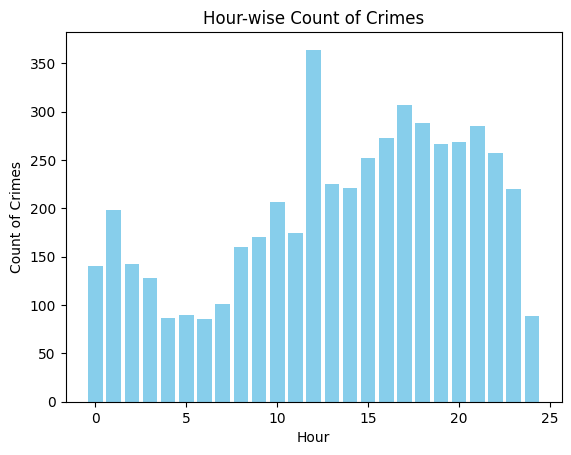

In [38]:
# Plotting the hour wise distribution
hourly_counts_test=X_test['Hour_Occurred'].value_counts().sort_index()
plt.bar(hourly_counts_test.index, hourly_counts_test.values, color='skyblue')
plt.xlabel('Hour')
plt.ylabel('Count of Crimes')
plt.title('Hour-wise Count of Crimes')

In [39]:
print(train['Location'].value_counts().sort_index)
print(test['Location'].value_counts().sort_index)

<bound method Series.sort_index of Location
6TH                                        33
7TH                                        32
VERMONT                      AV            31
6TH                          ST            31
7TH                          ST            30
                                           ..
2700 E  1ST                          ST     1
9300    SWINTON                      AV     1
MCKINLEY                                    1
WADE                         ST             1
DALTON                       AV             1
Name: count, Length: 12399, dtype: int64>
<bound method Series.sort_index of Location
7TH                          ST             10
FIGUEROA                                    10
6TH                          ST              9
BROADWAY                                     9
SHERMAN                      WY              8
                                            ..
600 W  5TH                          ST       1
300 S  COCHRAN                     

In [40]:
X_train=train

In [41]:
# Since the frequency of most occurred value for location is only 33(which is very small compared to 20000),dropping the feature location may increase the accuracy
X_train.drop(['Location'],axis=1,inplace=True)
X_test.drop(['Location'],axis=1)

,Latitude,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,Hour_Occurred
0,34.0128,3.0,376.0,2.0,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,400.0,IC,20.0
1,34.0726,20.0,2014.0,1.0,0344 0394,26.0,M,B,502.0,NaN,IC,17.0
2,33.9348,18.0,1844.0,2.0,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,NaN,IC,9.0
3,34.0497,7.0,765.0,1.0,NaN,0.0,NaN,NaN,108.0,NaN,IC,22.0
4,34.1611,15.0,1555.0,2.0,1501,37.0,F,W,501.0,NaN,AO,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,34.0409,7.0,775.0,1.0,NaN,0.0,NaN,NaN,101.0,NaN,IC,21.0
4996,34.0347,4.0,471.0,1.0,1300 0325,0.0,X,X,116.0,NaN,IC,16.0
4997,34.2392,19.0,1961.0,2.0,0913 1817 0416,38.0,M,H,101.0,400.0,AA,21.0
4998,34.0453,1.0,147.0,2.0,0416,41.0,M,B,502.0,500.0,AO,24.0


In [42]:
# Creating a dictionary to store the scores of each model on validation data
val_scores={}
weighted_f1_score={}
logloss={}

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict, StratifiedKFold
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,f1_score,log_loss,accuracy_score

# DATA PREPROCESSING 
#### INCLUDING IMPUTATION OF MISSING VALUES,ENCODING CATEGORICAL FEATURES AND SCALING NUMERICAL FEATURES

In [44]:
# Seperating the columns as categorical, numerical and text
categorical_cols=[ 'Victim_Sex', 'Victim_Descent', 'Status']
numerical_cols=['Latitude', 'Area_ID', 'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code', 'Weapon_Used_Code', 'Hour_Occurred']
text_col='Modus_Operandi'
 
X_train[text_col]=X_train[text_col].astype(str)
X_test[text_col]=X_test[text_col].astype(str)

# Numerical transformer
numeric_transformer=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical transformer
categorical_transformer=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Text transformer
text_transformer=Pipeline(steps=[
    ('tfidf', TfidfVectorizer(max_features=300))  
])


preprocessor=ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('text', text_transformer, text_col)
    ]
)

X_train_transformed=preprocessor.fit_transform(X_train)
X_test_transformed=preprocessor.transform(X_test)

In [45]:
print(X_train_transformed.shape,X_test_transformed.shape)

(20000, 334) (5000, 334)


### SPLITTING THE TRAINING DATA INTO TRAINING AND VALIDATION DATA

In [46]:
X_train, X_val, y_train, y_val=train_test_split(X_train_transformed, y_train, test_size=0.2, random_state=42)

In [47]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(16000, 334) (4000, 334) (16000,) (4000,)


### FEATURE SELECTION

In [48]:
# XGBoost model 
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=50,            
    max_depth=5,                
    tree_method='hist',         
    n_jobs=-1,                  
    random_state=42
)


# RFE for feature selection
selector = RFE(estimator=xgb, n_features_to_select=300,verbose=1)

# Label encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)


# Model fitting
selector.fit(X_train, y_train_encoded)

Fitting estimator with 334 features.
Fitting estimator with 333 features.
Fitting estimator with 332 features.
Fitting estimator with 331 features.
Fitting estimator with 330 features.
Fitting estimator with 329 features.
Fitting estimator with 328 features.
Fitting estimator with 327 features.
Fitting estimator with 326 features.
Fitting estimator with 325 features.
Fitting estimator with 324 features.
Fitting estimator with 323 features.
Fitting estimator with 322 features.
Fitting estimator with 321 features.
Fitting estimator with 320 features.
Fitting estimator with 319 features.
Fitting estimator with 318 features.
Fitting estimator with 317 features.
Fitting estimator with 316 features.
Fitting estimator with 315 features.
Fitting estimator with 314 features.
Fitting estimator with 313 features.
Fitting estimator with 312 features.
Fitting estimator with 311 features.
Fitting estimator with 310 features.
Fitting estimator with 309 features.
Fitting estimator with 308 features.
F

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, device=None,
                            early_stopping_rounds=None,
                            enable_categorical=False, eval_metric='logloss',
                            feature_types=None, gamma=None, grow_policy=None,
                            importance_type=None, interaction_constraints=None,
                            learning_rate=None, max_bin=None,
                            max_cat_threshold=None, max_cat_to_onehot=None,
                            max_delta_step=None, max_depth=5, max_leaves=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, multi_strategy=None,
                            n_estimators=50, n_jobs=-1, num_parallel_tree=None,
                            random_state=42, ...),
    n_features_to_select=300, verbose=1)

In [49]:

# Validation accuracy
val_score = selector.score(X_val, y_val_encoded)
print(f"Validation Accuracy: {val_score:.4f}")


Validation Accuracy: 0.9523


In [50]:
print(selector.support_)  # True indicates selected columns

print(f"Rank of each feature are {selector.ranking_}") 

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False False False  True False False
 False False False False False False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [51]:
# cross validation
X_train_selected_rfe = selector.transform(X_train)
X_val_selected_rfe = selector.transform(X_val)

cv_scores = cross_val_score(xgb, X_train_selected_rfe, y_train_encoded, cv=5, scoring='f1_weighted', n_jobs=-1)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of CV Scores: {np.std(cv_scores):.4f}")

Cross-Validation Scores: [0.94738545 0.94478269 0.94919413 0.94884355 0.94708617]
Mean CV Score: 0.9475
Standard Deviation of CV Scores: 0.0016


In [52]:
print("X_train_selected_rfe shape:", X_train_selected_rfe.shape)
print("X_val_selected_rfe shape:", X_val_selected_rfe.shape)


X_train_selected_rfe shape: (16000, 300)
X_val_selected_rfe shape: (4000, 300)


#### **SelectFromModel**

In [53]:
# Apply SelectFromModel
feature_selector = SelectFromModel(xgb, threshold="mean")
feature_selector.fit(X_train, y_train_encoded)

# Transform the training and validation data
X_train_selected1 = feature_selector.transform(X_train)
X_val_selected1 = feature_selector.transform(X_val)

# Train the model on the selected features
xgb.fit(X_train_selected1, y_train_encoded)

# Predict on the validation set
y_val_pred = xgb.predict(X_val_selected1)

# Evaluate the model
val_accuracy = accuracy_score(y_val_encoded, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# cross validation
cv_scores = cross_val_score(xgb, X_train_selected1, y_train_encoded, cv=5, scoring='f1_weighted', n_jobs=-1)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of CV Scores: {np.std(cv_scores):.4f}")

# Get selected feature names
selected_features = feature_selector.get_support()  # Boolean mask

def get_feature_names(preprocessor):
    feature_names = []
    for name, transformer, columns in preprocessor.transformers_:
        if hasattr(transformer, 'get_feature_names_out'):
            feature_names.extend(transformer.get_feature_names_out())
        else:
            feature_names.extend(columns)
    return feature_names

# Obtain feature names
feature_names = get_feature_names(preprocessor)

selected_features = feature_selector.get_support()  # Boolean mask


print("Selected Features:")
print(selected_features)

Validation Accuracy: 0.9475
Cross-Validation Scores: [0.94614047 0.94491444 0.94979988 0.94589072 0.94383016]
Mean CV Score: 0.9461
Standard Deviation of CV Scores: 0.0020
Selected Features:
[False False False  True  True  True  True False False False False  True
 False False False False False False False False False False False False
 False False False False False False False  True False False  True False
 False False False False False False False False False  True False False
 False False False False False False False False False False  True False
 False  True False False  True False False  True False False False  True
 False False False False False False False  True  True False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False  True False
  True False False False  True  True False False False  True False False
 False  True False  True  True False  True  True  True False False False
 False

### BASELINE MODEL

In [54]:
model1=DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
model1.fit(X_train,y_train)

y_pred1=model1.predict(X_val)
val_scores['Dummy']=model1.score(X_val,y_val)
print("Validation Score:",val_scores['Dummy'])

weighted_f1_score['Dummy']=f1_score(y_val, y_pred1, average='weighted')
y_pred_prob=model1.predict_proba(X_val)
logloss['Dummy']=log_loss(y_val, y_pred_prob)

Validation Score: 0.57575


#### *BASELINE SUBMISSION SCORE:0.5866*

# **MODEL 1:LOGISTIC REGRESSION**

Logistic Training Accuracy: 0.9239
Logistic Validation Accuracy: 0.8998
                               precision    recall  f1-score   support

       Crimes against Persons       0.26      0.72      0.38        32
  Crimes against Public Order       0.75      0.75      0.75       374
Fraud and White-Collar Crimes       0.97      0.87      0.92       267
                 Other Crimes       0.16      0.71      0.26        35
              Property Crimes       0.99      0.95      0.97      2303
               Violent Crimes       0.92      0.86      0.89       989

                     accuracy                           0.90      4000
                    macro avg       0.67      0.81      0.69      4000
                 weighted avg       0.93      0.90      0.91      4000



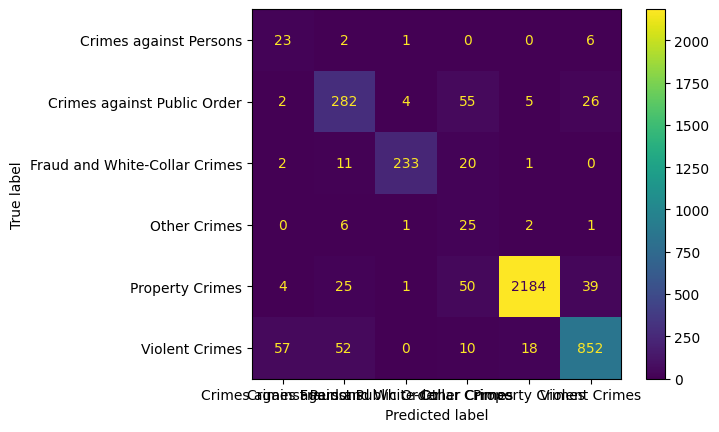

In [55]:
# Hyper parameter tuning is done for the parameters of logistic regression and the code is commented in this block.
# The parameters in the log_model is obtained from the results of grid search


model2=LogisticRegression(random_state=42,class_weight='balanced',C=100,max_iter=300,penalty='l2',solver='lbfgs')
# param_grid={
#      'C': [0.01, 0.1,1,10,100],
#      'solver': ['lbfgs', 'liblinear','saga'],
#      'penalty': ['l2'],
#      'max_iter': [100, 200, 300]
# }

# grid_search=GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


model2.fit(X_train, y_train)

# Evaluating the model
train_accuracy=model2.score(X_train, y_train)
val_accuracy=model2.score(X_val, y_val)

print(f"Logistic Training Accuracy: {train_accuracy:.4f}")
print(f"Logistic Validation Accuracy: {val_accuracy:.4f}")

y_pred2=model2.predict(X_val)

# Classification report
print(classification_report(y_val, y_pred2))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_pred2)


In [56]:
#Cross validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model2, X_train, y_train_encoded, cv=kf, scoring='accuracy',n_jobs=-1)

print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Accuracy: 0.9041 ± 0.0030


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
val_scores['Logistic']=accuracy_score(y_val,y_pred2)
print("Validation Score:",val_scores['Logistic'])
weighted_f1_score['Logistic']=f1_score(y_val, y_pred2, average='weighted')
y_pred_prob=model2.predict_proba(X_val)
logloss['Logistic']=log_loss(y_val, y_pred_prob)

Validation Score: 0.89975


# **MODEL 2:DECISION TREE CLASSIFIER**

Training Accuracy: 1.0000
Validation Accuracy: 0.9173
                               precision    recall  f1-score   support

       Crimes against Persons       0.53      0.66      0.58        32
  Crimes against Public Order       0.76      0.74      0.75       374
Fraud and White-Collar Crimes       0.84      0.90      0.87       267
                 Other Crimes       0.21      0.23      0.22        35
              Property Crimes       0.98      0.98      0.98      2303
               Violent Crimes       0.90      0.89      0.89       989

                     accuracy                           0.92      4000
                    macro avg       0.70      0.73      0.71      4000
                 weighted avg       0.92      0.92      0.92      4000



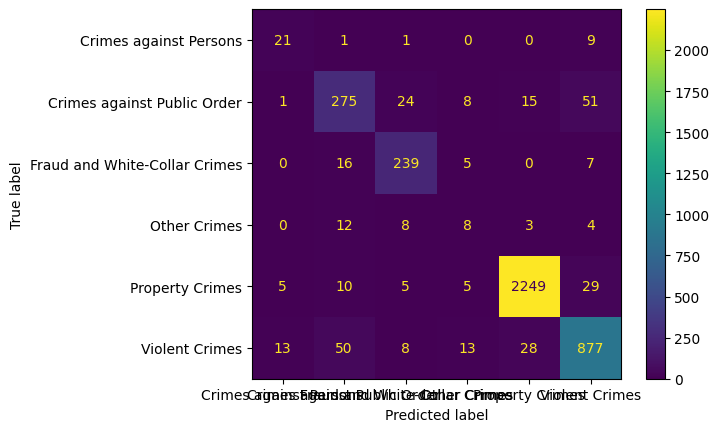

In [58]:
model3=DecisionTreeClassifier(random_state=42,class_weight='balanced')

model3.fit(X_train, y_train)


# Evaluating the model 
train_accuracy=model3.score(X_train, y_train)
val_accuracy=model3.score(X_val, y_val)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Make prediction on the validation set
y_pred3=model3.predict(X_val)

# Display the classification report
print(classification_report(y_val, y_pred3))

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_pred3)


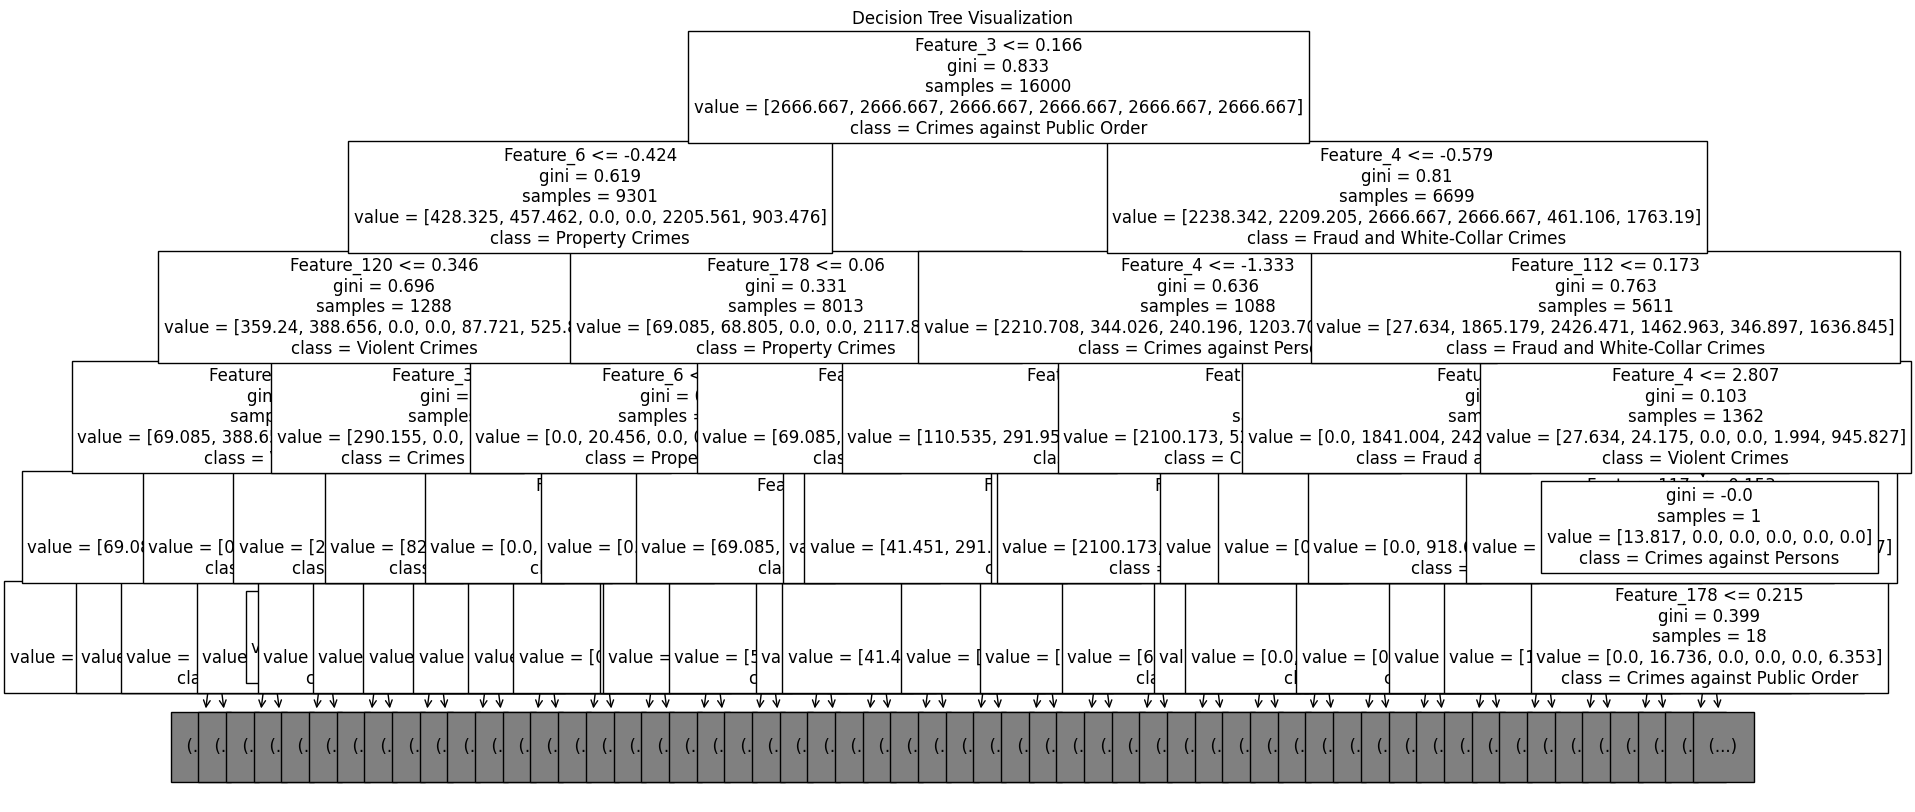

In [59]:
from sklearn.tree import plot_tree

tree=model3
feature_names=[f"Feature_{i}" for i in range(tree.n_features_in_)]

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(model3, 
          feature_names=feature_names,  
          class_names=model3.classes_,  
          fontsize=12,
          max_depth=5)
plt.title("Decision Tree Visualization")
plt.show()


In [60]:
val_scores['Decision_tree']=accuracy_score(y_val,y_pred3)
print("Validation Score:",val_scores['Decision_tree'])
weighted_f1_score['Decision_tree']=f1_score(y_val, y_pred3, average='weighted')
y_pred_prob=model3.predict_proba(X_val)
logloss['Decision_tree'] = log_loss(y_val, y_pred_prob)

Validation Score: 0.91725


#### **SUBMISSION SCORE:0.91720**

Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.9132
Training Accuracy: 1.0000
Validation Accuracy: 0.9173
                               precision    recall  f1-score   support

       Crimes against Persons       0.53      0.66      0.58        32
  Crimes against Public Order       0.76      0.74      0.75       374
Fraud and White-Collar Crimes       0.84      0.90      0.87       267
                 Other Crimes       0.21      0.23      0.22        35
              Property Crimes       0.98      0.98      0.98      2303
               Violent Crimes       0.90      0.89      0.89       989

                     accuracy                           0.92      4000
                    macro avg       0.70      0.73      0.71      4000
                 weighted avg       0.92      0.92      0.92      4000



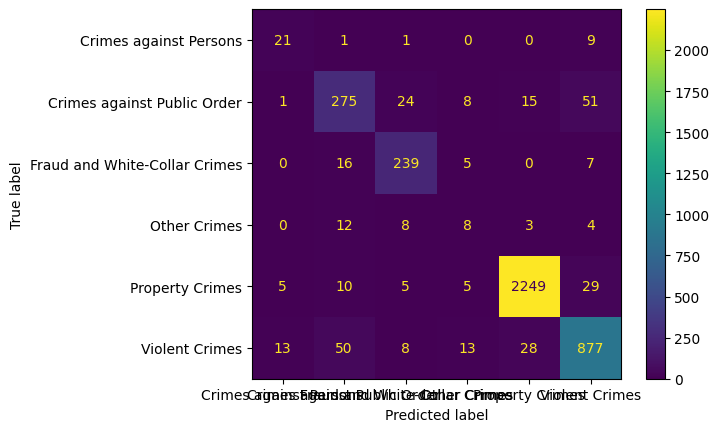

In [61]:

param_grid={
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search1=GridSearchCV(model3, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search1.fit(X_train, y_train)

# Printing best parameters and best score
print(f"Best parameters: {grid_search1.best_params_}")
print(f"Best cross-validation score: {grid_search1.best_score_:.4f}")

# Evaluating the model 
train_accuracy = grid_search1.score(X_train, y_train)
val_accuracy = grid_search1.score(X_val, y_val)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Make prediction on the validation set
y_pred_tuned1 = grid_search1.predict(X_val)

# Classification report
print(classification_report(y_val, y_pred_tuned1))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_tuned1)

In [62]:
#Cross validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model3, X_train, y_train_encoded, cv=kf, scoring='accuracy',n_jobs=-1,verbose=1)

print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Cross-Validation Accuracy: 0.9161 ± 0.0058


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


In [63]:
val_scores['Decision_tree_HT']=accuracy_score(y_val,y_pred_tuned1)
print("Validation Score:",val_scores['Decision_tree_HT'])
weighted_f1_score['Decision_tree_HT']=f1_score(y_val, y_pred_tuned1, average='weighted')
y_pred_prob=grid_search1.predict_proba(X_val)
logloss['Decision_tree_HT']=log_loss(y_val, y_pred_prob)

Validation Score: 0.91725


#### After applying hyper-parameter tuning through grid search,the validation accuracy appears to be same.

# **MODEL 3:RANDOM FOREST CLASSIFIER**

Training Accuracy: 1.0000
Validation Accuracy: 0.9387
                               precision    recall  f1-score   support

       Crimes against Persons       0.68      0.53      0.60        32
  Crimes against Public Order       0.88      0.77      0.82       374
Fraud and White-Collar Crimes       0.94      0.89      0.91       267
                 Other Crimes       0.80      0.11      0.20        35
              Property Crimes       0.98      0.98      0.98      2303
               Violent Crimes       0.88      0.96      0.92       989

                     accuracy                           0.94      4000
                    macro avg       0.86      0.71      0.74      4000
                 weighted avg       0.94      0.94      0.94      4000



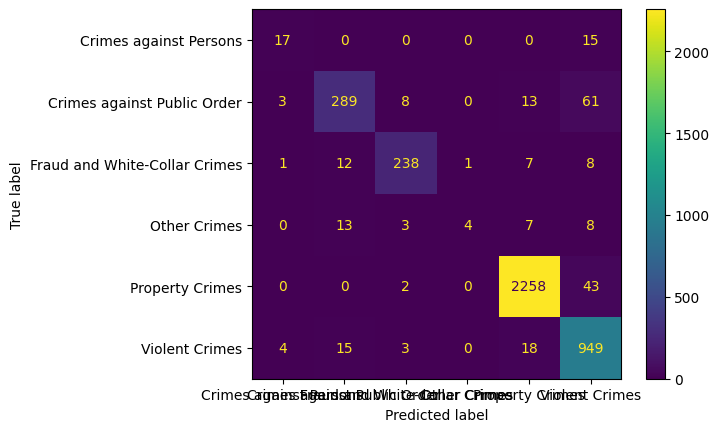

In [64]:

model4=RandomForestClassifier(random_state=42,class_weight='balanced')


model4.fit(X_train, y_train)

# Evaluating the model
train_accuracy=model4.score(X_train, y_train)
val_accuracy=model4.score(X_val, y_val)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Make prediction on the validation set
y_hat=model4.predict(X_val)

# Classification report
print(classification_report(y_val, y_hat))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_hat)


In [65]:
val_scores['RandomForest']=accuracy_score(y_val,y_hat)
print("Validation Score:",val_scores['RandomForest'])
weighted_f1_score['RandomForest']=f1_score(y_val, y_hat, average='weighted')
y_pred_prob=model4.predict_proba(X_val)
logloss['RandomForest']=log_loss(y_val, y_pred_prob)

Validation Score: 0.93875


In [66]:
#Cross validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model4, X_train, y_train_encoded, cv=kf, scoring='accuracy',n_jobs=-1,verbose=1)

print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Cross-Validation Accuracy: 0.9421 ± 0.0055


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.2s finished


#### **SUBMISSION SCORE:0.94020**

Training Accuracy: 0.9762
Validation Accuracy: 0.9387
                               precision    recall  f1-score   support

       Crimes against Persons       0.58      0.81      0.68        32
  Crimes against Public Order       0.87      0.80      0.84       374
Fraud and White-Collar Crimes       0.86      0.93      0.89       267
                 Other Crimes       0.34      0.29      0.31        35
              Property Crimes       0.99      0.97      0.98      2303
               Violent Crimes       0.90      0.94      0.92       989

                     accuracy                           0.94      4000
                    macro avg       0.76      0.79      0.77      4000
                 weighted avg       0.94      0.94      0.94      4000



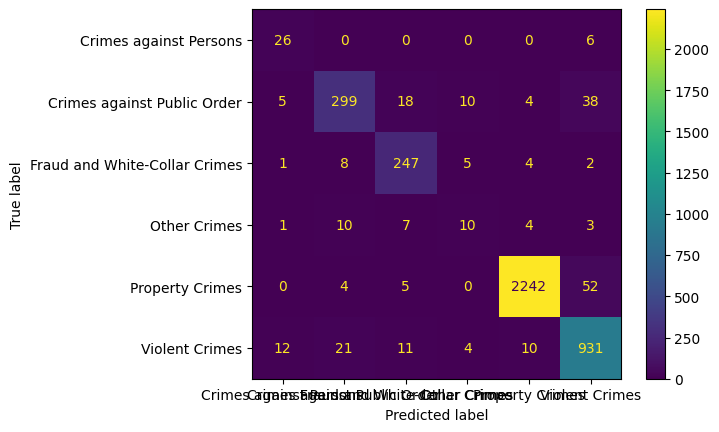

In [67]:
# Define the parameter grid for hyperparameter tuning
param_grid={
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


# Hyperparameter tuning
random_search=RandomizedSearchCV(model4, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=5, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Evaluating the model
train_accuracy=random_search.score(X_train, y_train)
val_accuracy=random_search.score(X_val, y_val)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Make prediction on the validation set
y_hat_tuned=random_search.predict(X_val)

# Classification report
print(classification_report(y_val, y_hat_tuned))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_hat_tuned)


In [68]:
val_scores['RandomForest_HT']=accuracy_score(y_val,y_hat_tuned)
print("Validation Score:",val_scores['RandomForest_HT'])
weighted_f1_score['RandomForest_HT']=f1_score(y_val, y_hat_tuned, average='weighted')
y_pred_prob=random_search.predict_proba(X_val)
logloss['RandomForest_HT']=log_loss(y_val, y_pred_prob)

Validation Score: 0.93875


# **MODEL 4:MLP CLASSIFIER**

Training Accuracy: 0.9665
Validation Accuracy: 0.9457
                               precision    recall  f1-score   support

       Crimes against Persons       0.59      0.50      0.54        32
  Crimes against Public Order       0.79      0.86      0.83       374
Fraud and White-Collar Crimes       0.97      0.91      0.94       267
                 Other Crimes       0.46      0.17      0.25        35
              Property Crimes       0.98      0.99      0.98      2303
               Violent Crimes       0.93      0.94      0.93       989

                     accuracy                           0.95      4000
                    macro avg       0.79      0.73      0.75      4000
                 weighted avg       0.94      0.95      0.94      4000



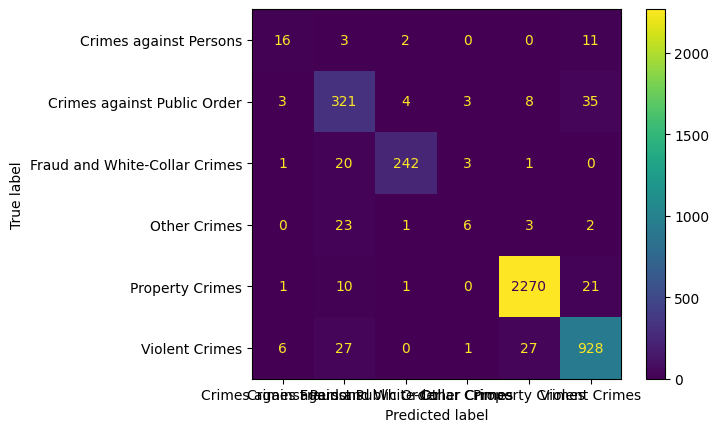

In [69]:

model5=MLPClassifier(random_state=42,max_iter=1000, early_stopping=True, validation_fraction=0.1)
    

# Label encoding
label_encoder=LabelEncoder()
y_train_encoded=label_encoder.fit_transform(y_train)
y_val_encoded=label_encoder.transform(y_val)


# Model fitting
model5.fit(X_train, y_train_encoded)

# Evaluating the model on training and validation sets
train_accuracy=model5.score(X_train, y_train_encoded)
val_accuracy=model5.score(X_val, y_val_encoded)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Make prediction on the validation set
y_pred_encoded=model5.predict(X_val)
y_pred5=label_encoder.inverse_transform(y_pred_encoded)

# Classification report
print(classification_report(y_val, y_pred5))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_pred5)

In [70]:
val_scores['MLPClassifier']=accuracy_score(y_val,y_pred5)
print("Validation Score:",val_scores['MLPClassifier'])
weighted_f1_score['MLPClassifier']=f1_score(y_val, y_pred5, average='weighted')
y_pred_prob=model5.predict_proba(X_val)
logloss['MLPClassifier']=log_loss(y_val, y_pred_prob)

Validation Score: 0.94575


In [71]:
#Cross validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model5, X_train, y_train_encoded, cv=kf, scoring='accuracy',n_jobs=-1,verbose=1)

print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Cross-Validation Accuracy: 0.9465 ± 0.0032


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.8s finished


#### **SUBMISSION SCORE:0.94420** 

# **MODEL 5:XGBCLASSIFIER**

Training Accuracy: 0.9923
Validation Accuracy: 0.9550
                               precision    recall  f1-score   support

       Crimes against Persons       0.72      0.72      0.72        32
  Crimes against Public Order       0.86      0.84      0.85       374
Fraud and White-Collar Crimes       0.94      0.94      0.94       267
                 Other Crimes       0.50      0.17      0.26        35
              Property Crimes       0.99      0.99      0.99      2303
               Violent Crimes       0.93      0.95      0.94       989

                     accuracy                           0.95      4000
                    macro avg       0.82      0.77      0.78      4000
                 weighted avg       0.95      0.95      0.95      4000



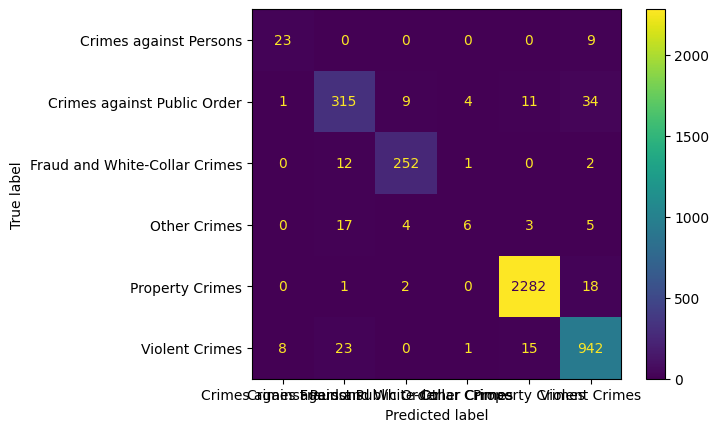

In [72]:

# XGBClassifier
model6=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Label encoding
label_encoder=LabelEncoder()
y_train_encoded=label_encoder.fit_transform(y_train)
y_val_encoded=label_encoder.transform(y_val)

# Model fitting
model6.fit(X_train, y_train_encoded)

# Evaluating the model on training and validation sets
train_accuracy=model6.score(X_train, y_train_encoded)
val_accuracy=model6.score(X_val, y_val_encoded)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Make prediction on the validation set
y_pred_encoded = model6.predict(X_val)
y_pred6 = label_encoder.inverse_transform(y_pred_encoded)

# Classification report
print(classification_report(y_val, y_pred6))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_pred6)


In [73]:
val_scores['XGB']=accuracy_score(y_val,y_pred6)
print("Validation Score:",val_scores['XGB'])
weighted_f1_score['XGB']=f1_score(y_val, y_pred6, average='weighted')
y_pred_prob=model6.predict_proba(X_val)
logloss['XGB']=log_loss(y_val, y_pred_prob)

Validation Score: 0.955


#### **SUBMISSION SCORE:0.95240**

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9523
Validation Accuracy: 0.9570
                               precision    recall  f1-score   support

       Crimes against Persons       0.73      0.84      0.78        32
  Crimes against Public Order       0.87      0.84      0.86       374
Fraud and White-Collar Crimes       0.95      0.95      0.95       267
                 Other Crimes       0.50      0.17      0.26        35
              Property Crimes       0.99      0.99      0.99      2303
               Violent Crimes       0.94      0.95      0.94       989

                     accuracy                           0.96      4000
                    macro avg       0.83      0.79      0.80      4000
                 weighted avg       0.95      0.96      0.95      4000



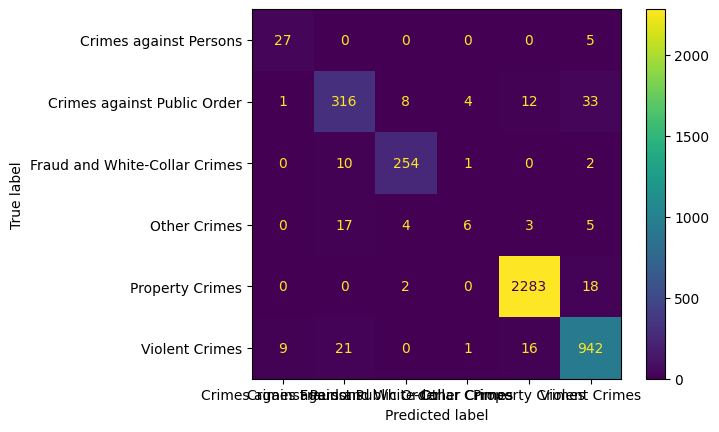

In [74]:

param_grid={
    'n_estimators': [100, 200],
    'max_depth': [ 5,6, 7],
    'learning_rate': [0.01, 0.1, 1],
}

grid_search2=GridSearchCV(model6, param_grid, cv=5, scoring='accuracy', n_jobs=-1,verbose=1)


# Label encoding
label_encoder=LabelEncoder()
y_train_encoded=label_encoder.fit_transform(y_train)
y_val_encoded=label_encoder.transform(y_val)

grid_search2.fit(X_train, y_train_encoded)

# To get the best parameters and best score
best_params=grid_search2.best_params_
best_score=grid_search2.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Evaluating the model on validation set
val_accuracy=grid_search2.score(X_val, y_val_encoded)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Make prediction on the validation set
y_pred_encoded=grid_search2.predict(X_val)
y_pred_tuned2=label_encoder.inverse_transform(y_pred_encoded)

# Classification report
print(classification_report(y_val,y_pred_tuned2))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val,y_pred_tuned2)


In [75]:
best_model=grid_search2.best_estimator_

xgb_model=best_model

# Feature importances
feature_importances=xgb_model.feature_importances_

# Feature names
categorical_feature_names=preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_cols)
text_feature_names=preprocessor.named_transformers_['text']['tfidf'].get_feature_names_out()
feature_names=np.concatenate((numerical_cols, categorical_feature_names, text_feature_names))

# Creating a dataframe to display feature importances
feature_importances_df=pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_importances_df)

              Feature  Importance
61               0329    0.070863
34               0100    0.069795
319              2038    0.068670
112              0416    0.046973
3            Part 1-2    0.044927
..                ...         ...
75               0351    0.000000
209              1221    0.000000
210              1222    0.000000
211              1223    0.000000
24   Victim_Descent_U    0.000000

[334 rows x 2 columns]


In [76]:
#Cross validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model6, X_train, y_train_encoded, cv=kf, scoring='accuracy',n_jobs=-1,verbose=1)

print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Cross-Validation Accuracy: 0.9498 ± 0.0049


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.4s finished


In [77]:
val_scores['XGB_HT']=accuracy_score(y_val,y_pred_tuned2)
print("Validation Score:",val_scores['XGB_HT'])
weighted_f1_score['XGB_HT']=f1_score(y_val, y_pred_tuned2, average='weighted')
y_pred_prob=grid_search2.predict_proba(X_val)
logloss['XGB_HT']=log_loss(y_val, y_pred_prob)

Validation Score: 0.957


#### **SUBMISSION SCORE:0.95140**

#### Since the validation accuracy decreases during submission through hyper-parameter tuning,the model with default parameters is taken into consideration

# Comparison of models

In [78]:
print("Validation accuracy scores\n")
print(val_scores,'\n')
print("Validation weighted F1 scores\n")
print(weighted_f1_score,'\n')
print("Validation errors(log loss)\n")
print(logloss,'\n')

Validation accuracy scores

{'Dummy': 0.57575, 'Logistic': 0.89975, 'Decision_tree': 0.91725, 'Decision_tree_HT': 0.91725, 'RandomForest': 0.93875, 'RandomForest_HT': 0.93875, 'MLPClassifier': 0.94575, 'XGB': 0.955, 'XGB_HT': 0.957} 

Validation weighted F1 scores

{'Dummy': 0.4207368713311122, 'Logistic': 0.9142761466708587, 'Decision_tree': 0.9178582624770409, 'Decision_tree_HT': 0.9178582624770409, 'RandomForest': 0.9352588691912224, 'RandomForest_HT': 0.9387255428318173, 'MLPClassifier': 0.9439985385390118, 'XGB': 0.9529076845968336, 'XGB_HT': 0.9549472006612578} 

Validation errors(log loss)

{'Dummy': 15.29151995033295, 'Logistic': 0.3195806864733811, 'Decision_tree': 2.982612317949445, 'Decision_tree_HT': 2.982612317949445, 'RandomForest': 0.2454449271297637, 'RandomForest_HT': 0.3794894463495657, 'MLPClassifier': 0.15425159703879648, 'XGB': 0.1333695931823084, 'XGB_HT': 0.13168476457666164} 



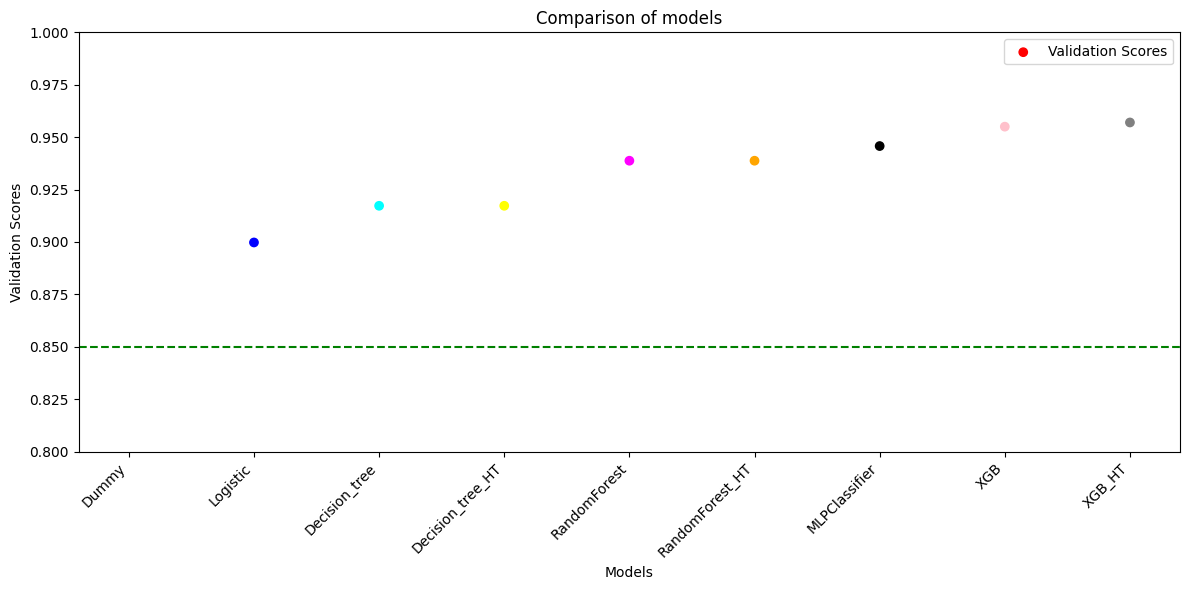

In [79]:
colors=['red','blue','cyan','yellow','magenta','orange','black','pink','grey']
plt.figure(figsize=(12, 6))
plt.scatter(list(val_scores.keys()), list(val_scores.values()), label='Validation Scores', marker='o',color=colors)
plt.ylim(0.8,1.0)
plt.xlabel('Models')
plt.ylabel('Validation Scores')
plt.title('Comparison of models')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.axhline(y=0.85,color='green',linestyle='--')
plt.tight_layout()
plt.show()

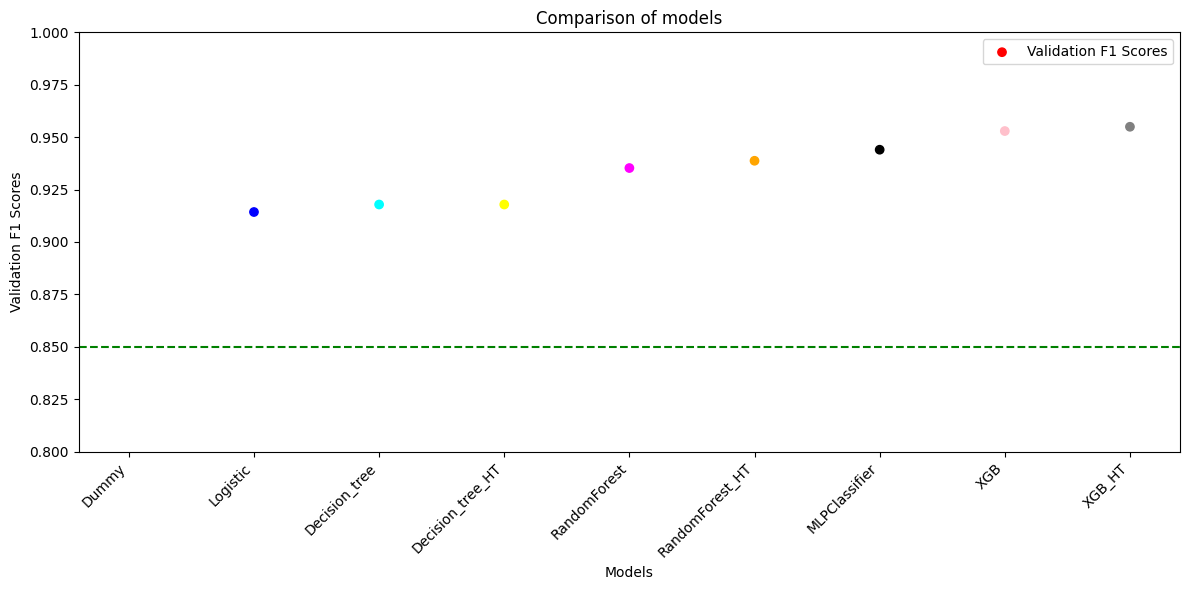

In [80]:
colors=['red','blue','cyan','yellow','magenta','orange','black','pink','grey']
plt.figure(figsize=(12, 6))
plt.scatter(list(weighted_f1_score.keys()), list(weighted_f1_score.values()), label='Validation F1 Scores', marker='o',color=colors)
plt.ylim(0.8,1.0)
plt.xlabel('Models')
plt.ylabel('Validation F1 Scores')
plt.title('Comparison of models')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.axhline(y=0.85,color='green',linestyle='--')
plt.tight_layout()
plt.show()

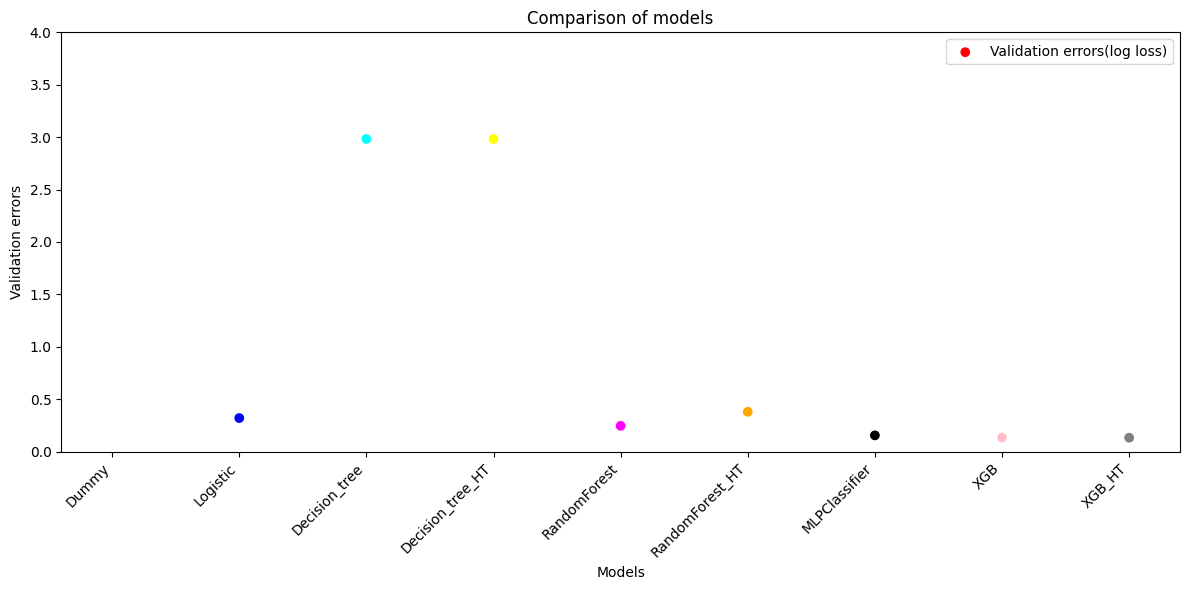

In [81]:
colors=['red','blue','cyan','yellow','magenta','orange','black','pink','grey']
plt.figure(figsize=(12, 6))
plt.scatter(list(logloss.keys()), list(logloss.values()), label='Validation errors(log loss)', marker='o',color=colors)
plt.ylim(0,4)
plt.xlabel('Models')
plt.ylabel('Validation errors')
plt.title('Comparison of models')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

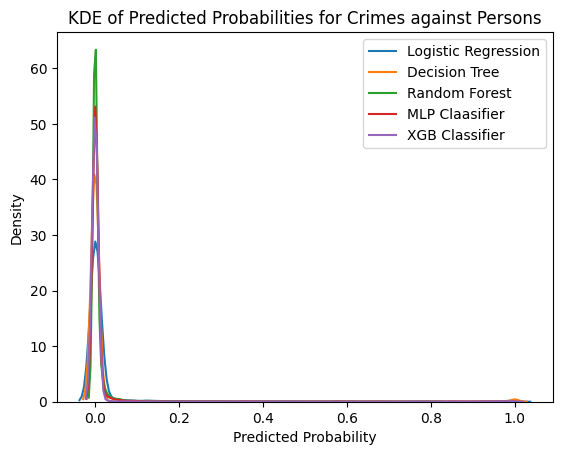

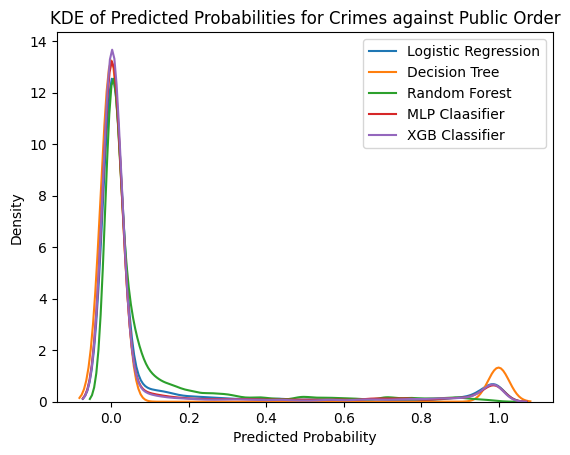

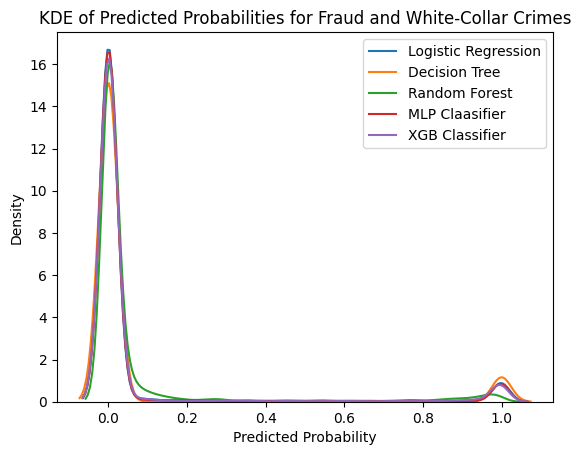

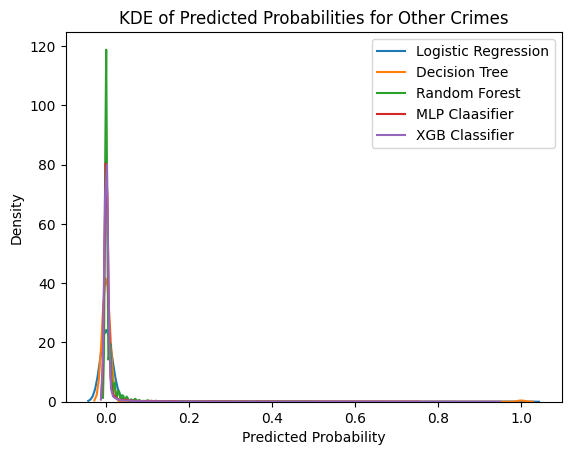

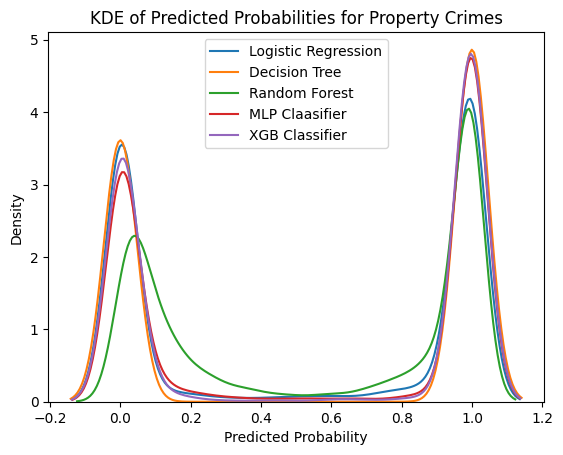

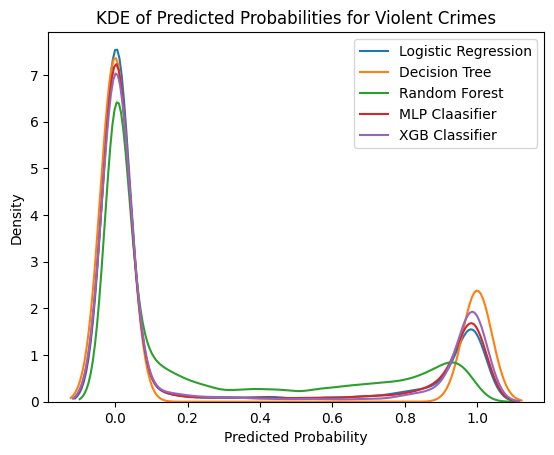

In [82]:
# Generating predicted probabilities for KDE plot
pred_probs_model1=model2.predict_proba(X_val)
pred_probs_model2=model3.predict_proba(X_val)
pred_probs_model3=model4.predict_proba(X_val)
pred_probs_model4=model5.predict_proba(X_val)
pred_probs_model5=model6.predict_proba(X_val)

# Extracting probabilities for each specific categories
for i in range(0,6):
    category_index=i
    probs_model1=pred_probs_model1[:, category_index]
    probs_model2=pred_probs_model2[:, category_index]
    probs_model3=pred_probs_model3[:, category_index]
    probs_model4=pred_probs_model4[:, category_index]
    probs_model5=pred_probs_model5[:, category_index]
    

    # Creating KDE plots
    sns.kdeplot(probs_model1, bw_adjust=0.5, label='Logistic Regression')
    sns.kdeplot(probs_model2, bw_adjust=0.5, label='Decision Tree')
    sns.kdeplot(probs_model3, bw_adjust=0.5, label='Random Forest')
    sns.kdeplot(probs_model4, bw_adjust=0.5, label='MLP Claasifier')
    sns.kdeplot(probs_model5, bw_adjust=0.5, label='XGB Classifier')

    plt.xlabel('Predicted Probability')
    plt.ylabel('Density')
    plt.title('KDE of Predicted Probabilities for '+ str(label_encoder.inverse_transform([category_index])[0]))
    plt.legend()

    plt.show()


### XGB Classifier without hypertuning has greater accuracy score and weighted f1 score and less error

In [83]:
X_test=X_test_transformed

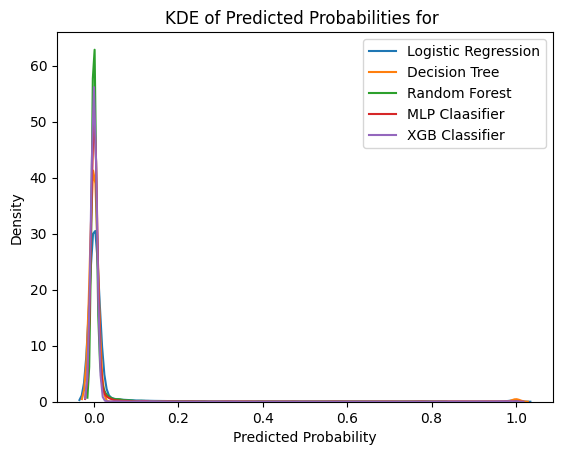

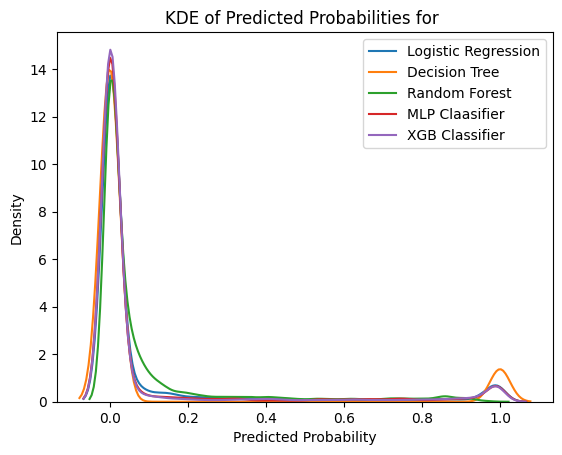

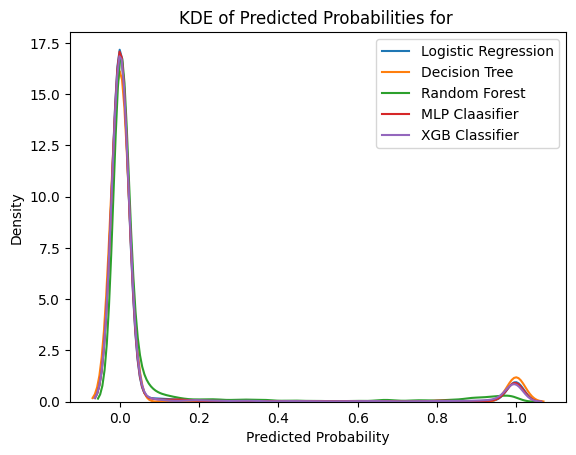

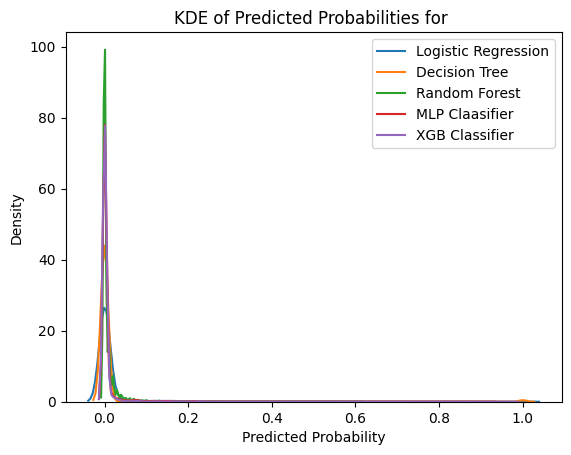

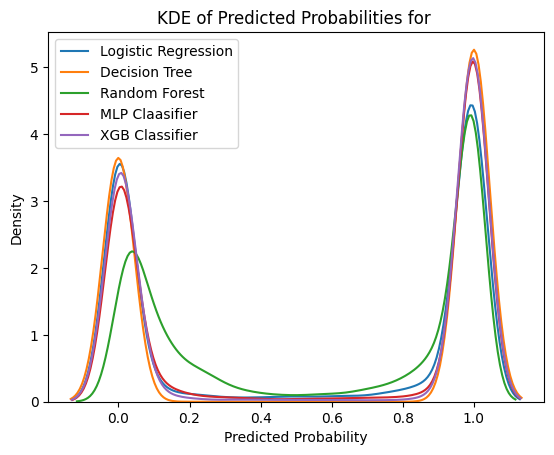

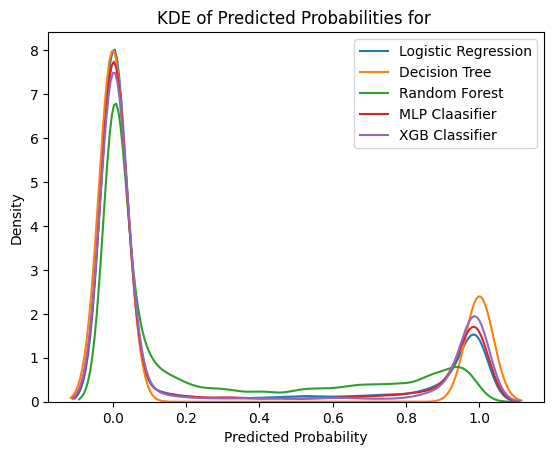

In [84]:
# Generating predicted probabilities for KDE plot
pred_probs_model1=model2.predict_proba(X_test)
pred_probs_model2=model3.predict_proba(X_test)
pred_probs_model3=model4.predict_proba(X_test)
pred_probs_model4=model5.predict_proba(X_test)
pred_probs_model5=model6.predict_proba(X_test)

# Extracting probabilities for each specific categories
for i in range(0,6):
    category_index = i
    probs_model1=pred_probs_model1[:, category_index]
    probs_model2=pred_probs_model2[:, category_index]
    probs_model3=pred_probs_model3[:, category_index]
    probs_model4=pred_probs_model4[:, category_index]
    probs_model5=pred_probs_model5[:, category_index]
    

    # Creating KDE plots
    sns.kdeplot(probs_model1, bw_adjust=0.5, label='Logistic Regression')
    sns.kdeplot(probs_model2, bw_adjust=0.5, label='Decision Tree')
    sns.kdeplot(probs_model3, bw_adjust=0.5, label='Random Forest')
    sns.kdeplot(probs_model4, bw_adjust=0.5, label='MLP Claasifier')
    sns.kdeplot(probs_model5, bw_adjust=0.5, label='XGB Classifier')

    plt.xlabel('Predicted Probability')
    plt.ylabel('Density')
    plt.title('KDE of Predicted Probabilities for ')
    plt.legend()

    plt.show()


# Submitting the model with best score

In [85]:
y_pred_encoded=model6.predict(X_test)
y_pred=label_encoder.inverse_transform(y_pred_encoded)
y_pred

array(['Violent Crimes', 'Property Crimes',
       'Fraud and White-Collar Crimes', ..., 'Violent Crimes',
       'Violent Crimes', 'Property Crimes'], dtype=object)

In [86]:
submission_df=pd.DataFrame({
    'ID': range(1, 5001), 
    'Crime_Category': y_pred
})

# Save the submission file
submission_df.to_csv('/kaggle/working/submission.csv', index=False)